In [1031]:
import numpy as np
# import scipy as sp
from scipy import interpolate
from scipy.stats import lognorm, norm, powerlaw
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import style
style.use('seaborn-whitegrid')
from IPython.display import clear_output
import glob
import random
import copy
import os
import zipfile
import itertools as it
import time as time_module
from amuse.units import units
import matplotlib.animation as manimation
import gc
import time
from tqdm import tqdm
import multiprocessing as mp
from functools import partial
import itertools

In [542]:
np.seterr(divide = 'ignore') ;
np.seterr(invalid = 'ignore') ;

In [141]:
gc.collect()

46128

## If output files are on the local machine

In [ ]:
outdir = "plots"
indir = "OutputFiles_scratch"


z = zipfile.ZipFile( indir)

# print(z.namelist()[:10])
files = np.load(indir)

EvoHist = []
for filename in z.namelist():
    if not os.path.isdir(filename):
        # read the file
#         print(filename)
        if filename[0:len("OutputFiles_test_v1/EvoHist")] == ("OutputFiles_test_v1/EvoHist"):
            EvoHist.append( filename )
            ehists.append( [])
            break
# print(EvoHist)




# zipped = True
# ehists = read_evo_history(EvoHist, zipped, z)
# # Cleanup (if there's no further use of it after this)
# del z                                 

In [21]:
manager = mp.Manager()
ehists = manager.list([])
k = 0
filenames = glob.glob('OutputFiles_scratch/EvoHist*')

def read(i, k):
    ehists.append(np.load(filenames[i], allow_pickle = True)['arr_0'])
    for j in range(len(ehists[k])):
        if type(ehists[k][j,2]) == np.ndarray:
            ehists[k][j,2] = ehists[k][j,2][0]
    k += 1

ncores = None
with tqdm(total=len(filenames)) as pbar:
    pool = mp.Pool(ncores, maxtasksperchild=int(1e5))
    for aic in enumerate(pool.imap_unordered(partial(read, k=k), 
                                    range(len(filenames)))):
        pbar.update()
    pool.close()
    pool.join()

100%|██████████| 148219/148219 [03:39<00:00, 676.78it/s] 


## If output files are on a REMOTE machine

In [545]:
import paramiko 

outdir = "plots"
indir = "/home/aashimas/anuj/OutputFiles_scratch"

host = "mash"
port = 22
username = "aashimas"
password = "aashi@1970"
ssh_client = paramiko.SSHClient() 

ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(host, port, username, password)

sftp_client = ssh_client.open_sftp()

In [4]:
# np.savez_compressed("/home/aashimas/anuj/ehists_allsys", ehists_allsys)
# sftp_client.close()
# ssh_client.close()

In [546]:
ehists_allsys = np.load("/home/aashimas/anuj/ehists_allsys.npz", allow_pickle=True)
ehists_allsys = ehists_allsys.f.arr_0
sftp_client.close()
ssh_client.close()

In [ ]:
z = zipfile.ZipFile( indir+'.zip' )
EvoHist = []
for filename in z.namelist():
    if not os.path.isdir(filename):
        # read the file
        if filename[0:len("OutputFiles_allsys/EvoHist")] == ("OutputFiles_allsys/EvoHist"):
            EvoHist.append( filename )
# EvoHist

In [37]:
def read_evo_history(EvoHist):
    ehists = []
    for i in range( len(EvoHist) ):
        try:  
            ehists.append( pd.read_csv(z.open(EvoHist[i]), delimiter = "\t", 
                    compression='gzip', header=None, na_values='nan ').to_numpy() )
        except pd.errors.EmptyDataError:
            pass
    return ehists

zipped = True
ehists = read_evo_history(EvoHist)
# Cleanup (if there's no further use of it after this)
# z.close()
del z 
sftp_client.close()
ssh_client.close()

In [186]:
len(ehists_allsys)

687433

In [547]:
ehists_mod = np.append(ehists_scratch, ehists_allsys)

## Read from .npz file

In [520]:
# ehists_scratch = np.load("ehists_scratch_1e10.npz", allow_pickle=True)
ehists_scratch = np.load("ehists_bulge_1e6.npz", allow_pickle=True)
# ehists_scratch = np.load("ehists_disk_1e6.npz", allow_pickle=True)
ehists_scratch = ehists_scratch.f.arr_0

# ehists = np.load("ehists_rec.npz", allow_pickle=True)
# ehists = ehists.f.arr_0

In [880]:
# ehists_g = np.load("ehists_bulge_gonthierB_1e6.npz", allow_pickle=True)
# ehists_g = ehists_g.f.arr_0

ehists_disk = np.load("ehists_disk_1e6.npz", allow_pickle=True)
ehists_disk = ehists_disk.f.arr_0

In [ ]:
ehists_mod = np.load("ehists_mod.npz", allow_pickle=True)
ehists_mod = ehists_mod.f.arr_0

In [124]:
len(ehists_scratch)

57027

In [6]:
len(ehists)

148219

In [34]:
M_sim = 0
for ehist in ehists_scratch:
    M_sim += ehist[0,3] + ehist[0,7]

In [35]:
M_sim

596078.44526290125

#### Modify data

In [8]:
ehists_ssp = list(copy.deepcopy(ehists_mod))
for i in aic_indices:
    ehists_mod2.append(ehists_scratch[i])

In [9]:
len(ehists_mod2)

692557

In [170]:
# np.savez_compressed("ehists_mod", ehists_mod)

/home/gautam/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Create file for evolution

In [ ]:
ehists = ehists_scratch

In [ ]:
aic_systems = np.zeros((len(ehists),4))
for i in range(len(ehists)):
    aic_systems[i,0] = ehists[i][0,3]
    aic_systems[i,1] = ehists[i][0,7]
    aic_systems[i,2] = ehists[i][0,2]
    aic_systems[i,3] = 0

In [ ]:
np.savez_compressed("aic_systems", aic_systems)

In [ ]:
aic_systems[0,0]

### Save NB variables?

In [ ]:
# dill.dump_session(foldername+'_env.db')
# dill.load_session(foldername+'_env.db')

In [331]:
np.savez_compressed("ehists_bulge_1e6", ehists)

/home/gautam/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
np.savez_compressed("ehists_scratch_1e10", ehists_mod)

In [ ]:
ehists_scratch = ehists

## MWB SFR

In [530]:
## Bulge
def f_bulge(z):
    A = -2.62e-2
    B = 0.384
    C = -8.42e-2
    D = 3.254
    return A*z**2 + B*z + C, D


## disk
def f_disk(z):
    A = -4.06e-2
    B = 0.331
    C = 0.338
    D = 0.771
    return A*z**2 + B*z + C, D



# def z(t):
#     t0 = t_end
#     k = t0**(2.0/3)     # today at z = 0, t = t0
#     if t == 0:
#         z = 1e10
#     else:
#         z = k*(t)**(-2.0/3) - 1
#     return z

def z(t):
    t0 = t_end
#     k = (2/69.4)*1e9*3.154e7
    z = np.sqrt((28e9 - t)/t) -1
    return z


def sfh(b_d):
    ## SFR
    t = np.arange(0, t_end, dt)
    sfh = []
    for time in t: 
        if b_d == "Bulge":
            ft, D = f_bulge(z(time))
        elif b_d == "Disk":
            ft, D = f_disk(z(time))
        rate = 10**(max(ft, 0)) - D
        if rate >= 0:
            sfh.append(rate)
        else:
            sfh.append(0)
    return np.array(sfh)


def Nformed_at_t(dt, M_bulge, M_sim, SFR):
    rate = SFR*(M_sim/M_bulge)
    sfr = (rate/sum(rate)) * length
    print(sum(sfr), length)
    t = np.arange(0, t_end, dt)
#     plt.semilogy(t/1e9, (rate/sum(rate)))
#     plt.semilogy(t/1e9, sfr)
    tr = []
    l = 0
    for i in range(len(t)):
        if sfr[i]==0 or sfr[i]==np.nan:
            pass
        else:
            for j in range( int(round(sfr[i])) ):
                tr.append( t[i] )
                l += 1
#     if l>length:
#         tr = tr[0:length]
#     else:
#         t_maxsfr = t[np.argmax(sfr)]
#         tr += [t_maxsfr]*int(length-l)
    return tr


In [ ]:
t_end = 16e9
dt = 1e6
t = np.arange(0, t_end, dt)
# length = len(ehists)
length = 0.095*1e9
M_d = 3.7e10
sfr_d = sfh("Disk")
# sfr_d[:274] = 0
tr_d = Nformed_at_t(dt, M_d, 2e9, sfr_d)

In [475]:
tr_d = np.load("tr_d.npz", allow_pickle=True)
tr_d = tr_d.f.arr_0

In [ ]:
t_end = 16e9
dt = 1e6
t = np.arange(0, t_end, dt)
# length = len(ehists)
length = 0.095*1e9
M_b = 1.55e10
sfr_b = sfh("Bulge")
tr_b = Nformed_at_t(dt, M_b, 1e9, sfr_b)

In [531]:
tr_b = np.load("tr_b_M1e10.npz", allow_pickle=True)
tr_b = tr_b.f.arr_0

In [487]:
# np.savez_compressed("tr_d", tr_d)

In [ ]:
len(tr_b)

In [ ]:
gc.collect()

In [ ]:
plt.figure(figsize=(10, 8))
plt.semilogy(t/1e9, sfr_d, label="Galactic disk")
plt.semilogy(t/1e9, sfr_b, label="Galactic bulge")
plt.ylabel(r'SFR $\rm (M_\odot/yr)$', fontsize=16)
plt.xlabel('Time since formation (Gyr)', fontsize=16)
# plt.title('Galactic bulge star-formation history', fontsize=16)
plt.title('Star-formation history', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

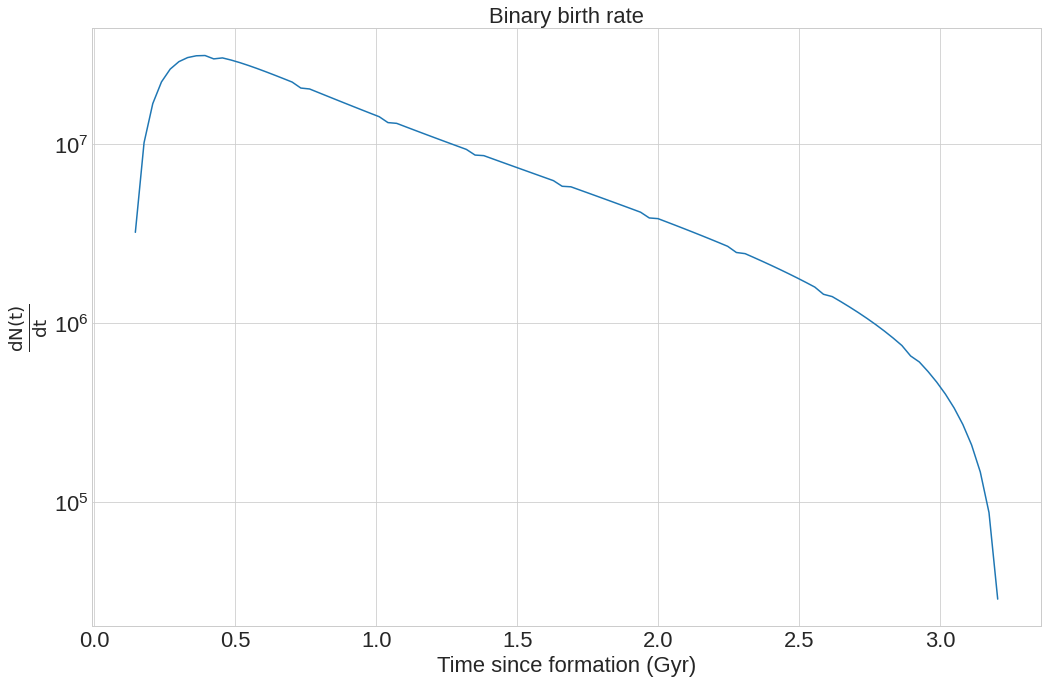

In [609]:
plt.figure(figsize=(17, 11))
# n, edges = np.histogram(tr_d,100)
# plt.semilogy(edges[:-1]/1e9, n, label="Disk")
n, edges = np.histogram(tr_b,100)
plt.semilogy(edges[:-1]/1e9, n)
plt.ylabel(r'$\frac{\rm{d}N(t)}{\rm{d}t}$', fontsize=26)
plt.xlabel('Time since formation (Gyr)', fontsize=22)
plt.title('Binary birth rate', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.legend(fontsize=18)
plt.show()

In [ ]:
np.array(tr)/1e9

In [137]:
tr_b[np.argmin(tr_b)]/1e9

0.14499999999999999

In [50]:
n, edges = np.histogram(tr_b,bins=int(1e4))
edges[np.argmax(n)]/1e6

0.397762

In [51]:
edges[np.argmax(n)]/1e6

397.762

### Modifying ehists

In [177]:
def modify_ehists(i):
#     ehists[i][0,0] = random.choice(tr_b)/1e6
    ehists[i][0,0] = 0
    B_ = random.choice(B_sam)
    for j in range(1, len(ehists[i])):
        ehists[i][j,0] = ehists[i][j-1,0] + (ehists[i][j,1]-ehists[i][j-1,1])
        if ehists[i][j,5] == 13:
            ehists[i][j,14] = B_

In [176]:
mu = 8.21
sigma = 0.21
s = np.random.normal(mu, sigma, int(1e6))
B_sim_chris = 10**s
x = np.linspace(min(B_sim_chris), max(B_sim_chris), int(4e3))
p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
B_sam = []
for i in range(len(x)):
    B_sam += [x[i]]*int(len(x)*p[i])

In [178]:
from tqdm import tqdm
import multiprocessing as mp
# from threading import Semaphore
ncores = None
# manager = mp.Manager()

ehists = copy.deepcopy(ehists_mod)
if ncores == 1:
    for i in range(len(ehists)):
        parallel_evolution(i)
else:
    with tqdm(total=len(ehists)) as pbar:
#         pool = mp.Pool(ncores, maxtasksperchild=int(1e5))
#         for aic in enumerate(pool.imap_unordered(modify_ehists, 
#                                         range(len(ehists)))):
        for i in range(len(ehists)):
            modify_ehists(i)
            pbar.update()

ehists_ssp = copy.deepcopy(ehists)

100%|██████████| 61097/61097 [00:29<00:00, 2079.53it/s]


In [127]:
# np.savez_compressed("ehists_mod", ehists_mod)

In [ ]:
##Disk
ehists_disk = modify_ehists(copy.deepcopy(ehists), tr_d)

In [ ]:
##Bulge
ehists_bulge = modify_ehists(copy.deepcopy(ehists_mod), tr_b)

In [42]:
ehists[0][0,0]

11664.0

### Indices of AIC systems

In [881]:
aic_indices = []
t_aic_all = []
ehists = ehists_disk
# ehists = ehists_scratch
# ehists = ehists_mod

with tqdm(total=len(ehists)) as pbar:
    for i in range( len(ehists) ):
#         onewd = False
        aic = False
        try:
            k_onewd = list(ehists[i][:,5]).index(12)
#             onewd = True
            k_ns = list(ehists[i][:,5]).index(13)
            aic_indices.append(i)
            t_aic_all.append(ehists[i][k_ns,0])
            aic = True
        except ValueError:
            aic = False
        pbar.update()    
            
# del ehists
# aic_indices_bulge = aic_indices
aic_indices_disk = aic_indices
# aic_indices_mod = aic_indices

100%|██████████| 57027/57027 [00:03<00:00, 18158.62it/s]


In [ ]:
# np.savez_compressed("ehists_s1e6_indices", aic_indices)

In [17]:
ehists_disk[aic_indices[5]][:,5], ehists_scratch[aic_indices[5]][:,5]

(array([  1.,   1.,   4., ...,  13.,  13.,  13.]), array([ 1.,  1.]))

In [30]:
ehists_scratch[aic_indices[1]][:,5]

array([  1.,   1.,   4., ...,  13.,  13.,  13.])

In [8]:
len(aic_indices)

5124

AIC events

In [331]:
dt = 1e8
t_end = 17e9
t = np.arange(0, 15e9, dt)
aic_events = np.zeros( int(t_end/dt) )
other_channel = np.zeros( int(t_end/dt) )
k_donor = []
t_aic = []
ehists = ehists_mod

for i in aic_indices_mod:
    aic = False
    onewd = False
    for j in range( np.shape(ehists[i])[0] ):
        if int(ehists[i][j,0]*1e6/dt) != int(ehists[i][j-1,0]*1e6/dt) and ehists[i][j,2]> (ehists[i][j,4]+ehists[i][j,8]):
            if ehists[i][j,5] == 12:
                onewd = True
            if ehists[i][j,5] == 13 and onewd == True:
                aic = True
                aic_events[ int(ehists[i][j,0]*1e6/dt) ] += 1
                k_donor.append(ehists[i][j,9])
                t_aic.append(ehists[i][j,0])
                break
            elif ehists[i][j,5] == 13 and onewd == False:
                other_channel[ int(ehists[i][j,0]*1e6/dt) ] += 1
                aic = False
                break

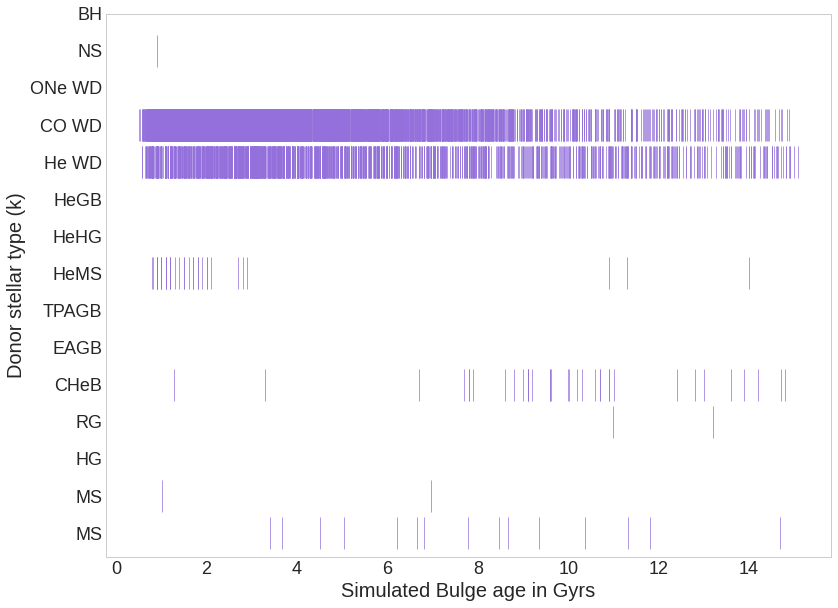

In [332]:
labels = [ "MS", "MS", "HG",  "RG", "CHeB", "EAGB", "TPAGB", "HeMS", "HeHG", "HeGB", "He WD", "CO WD", "ONe WD", "NS", "BH"] 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(1,1,1)
fig.canvas.draw()
ax.scatter(np.array(t_aic)/1e3, k_donor, marker="|", c="mediumpurple", s=1000, linewidth=0.7)
plt.yticks(np.arange(0, 15, 1))
ax.grid(False)
ax.set_yticklabels(labels)
plt.xlabel(r"Simulated Bulge age in Gyrs", fontsize=20)
plt.ylabel(r"Donor stellar type (k)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("AIC_donor_k.pdf")
plt.show()

In [58]:
k_donor.count(3)

0

In [408]:
G = 1.3218607e+26/(695700)**3               # km**3 * MSun**(-1) * yr**(-2)

time = 14000
redbacks = 0 
blackwidows = 0
ehists = ehists_scratch
for i in aic_indices:
    T = 2*np.pi * np.sqrt(ehists[i][-1,2]**3/(G*(ehists[i][-1,3]+ehists[i][-1,7])))
    if T*365<1:
        if ehists[i][-1,7]>=0.1:
            redbacks += 1
        if 0.1>ehists[i][-1,7]>=0.01:
            blackwidows += 1

In [409]:
len(aic_indices), redbacks, blackwidows

(5124, 6, 56)

In [382]:
(113/304)*100

37.17105263157895

In [ ]:
a = ( 1/(365*2*np.pi)**2 * G*(ehists[i][-1,3]+ehists[i][-1,7]) )
T = 2*np.pi * np.sqrt(ehists[i][-1,2]/(G*(ehists[i][-1,3]+ehists[i][-1,7])))

In [381]:
sum(np.array(P1[1400])<10e-3)

304

## Luminosity distribution, Power, $P-\dot{P}$ and $P-B$ w.r.t. time

In [522]:
M_bulge = 1.55e10
# M_sim = 7.3e8
M_sim = 2e9
k_bulge = M_bulge/M_sim

In [523]:
M_disk = 3.7e10
# M_sim = 1.63e8
M_sim = 2e9
k_disk = M_disk/M_sim

In [524]:
def magnetic_braking(P, dt, B, mass, m_dot, radius, a, AIC, alp, P_wd = 0, m_old = 1.44, r_old = 0.0145):
    flag = None
    P_old = P
    ddt = dt
    if AIC==True:
        w_s = 0
        G = 1.3218607e+26               # km**3 * MSun**(-1) * yr**(-2)
        RSun = 695700   ## km
        radius = radius * RSun * 1e5     ## cm
        c = 2.998e10 ## cm/
        

        T = 1e11
        t_g = 47 * (mass/1.4)**-1 * (radius/10)**-4 * (P/1e-3)**6 / 3.154e+7    #syr
        tb = 2.7e11 * (mass/1.4) * (radius/10)**-1 * (P/1e-3)**2 * (T/1e9)**-6 / 3.154e+7     #yr
        ts = 6.7e7 * (mass/1.4)**(-5/4) * (radius/10)**(23/4) * (P/1e-3)**2 * (T/1e9)**2 / 3.154e+7     #yr
        tau = 1 / abs(tb**-1 + ts**-1 - abs(t_g)**-1)
        Jc = 3 * 1.635e-2 * alp**2 * mass*radius**2 / 2
        Jc_dot = - 2* Jc/tau
    
                      
        dt = tau   #yr
                      
        I = (0.4)*(mass*radius**2)      ##g cm^2
        Idot = (I - (0.4)*(m_old * (r_old*RSun*1e5)**2)) / dt    
        w_wd = ( 2 * np.pi / P_wd ) * 3.154e+7   ##yr^-1
        w = ( 2 * np.pi / P ) * 3.154e+7   ##yr^-1
        wdot = (w - w_wd) / dt
        wdot_tot = wdot
#         m_coll_dot = abs(mass - m_old) / dt

        wdot = 3 * 1.635e-2 * alp**2 * w / (0.261*t_g)
        w = w - wdot*t_g
        Jdot = Idot*w + I*wdot + Jc_dot
        wdot = (Jdot/I) - (m_dot*w/mass) - (3*1.635e-2*alp**2*w/(I*tau))
        if 0.01<alp<1:
            wdot = (Jdot/I) * (1 - (3 * 1.635e-2 * alp**2 / (2*0.261)))**-1 - (m_dot*w/mass)
        wdot_tot += wdot
        w = w - wdot*dt
        P = ( 2 * np.pi / w ) * 3.154e+7
        
        alp_dot = -alp*(1/tau + wdot_tot/(2*w) + m_dot/(2*mass))
        alp += alp_dot
           
    mdot_lim = 0   
    if m_dot > mdot_lim: ## MB Accretion-Torque Model-2019, Gittins and Andersson et. al. ::: Accretng Millisecond X-ray Pulsars (AMXPs
        g = 6.67408e-11 |(units.m**3 * units.kg**(-1) * units.s**(-2))
        gauss = units.cm**(-1.0/2) * units.g**(1.0/2) * units.s**(-1)
        b = B |gauss
        mass = mass |units.MSun
        r = radius |units.RSun
        m_dot = m_dot |units.MSun/units.yr
        dt = dt |units.yr
        w = ( 2 * np.pi / P ) * 3.154e+7   ##yr^-1
        w_old = w |units.yr**-1

        mu = b*r**3         ## G cm^3

        I = (0.4)*(mass*r**2)
#         I = I.as_quantity_in(units.g * units.cm**2) 
        # print(I)
    
        r_A = ( (mu)**4 / (2*g*mass * m_dot**2) )**(1.0/7.0)   
        r_A = r_A.as_quantity_in(units.km)       # km
        r_m = xi*r_A
        r_c = (g*mass/w_old**2)**(1.0/3.0) 

        w = ( 2 * np.pi / P ) * 3.154e+7
        w_K_r_m = np.sqrt(g*mass/r_m**3)        
        w_K_r_m = w_K_r_m.as_quantity_in(1/units.yr)  
        w_s = w / w_K_r_m.value_in(units.yr**(-1)) 
        P_old = P
        if r_m.value_in(units.km) < r_c.value_in(units.km):
            w_dot = m_dot*np.sqrt(g*mass*r_m)/I
            w = w + w_dot.value_in(units.yr**-2)*dt.value_in(units.yr)
            P = ( 2 * np.pi / w ) * 3.154e+7
            P_dot = (P - P_old)/dt.value_in(units.s)
            flag = 1

        if r_m.value_in(units.km) >= r_c.value_in(units.km):
#         else:
            P_dot = - (1-w_s) * 8.1e-5 * np.sqrt(xi) * (mass.value_in(units.MSun)/1.4)**(3.0/7.0) * (1e45/I.value_in(units.g*units.cm**2)) * (mu.value_in(gauss*units.cm**3)/1e30)**(2.0/7.0) * ( P*abs(m_dot.value_in(units.MSun/units.yr)/1e-9)**(3.0/7.0) )**2     ## s/yr
            P_dot = P_dot/3.154e+7   ## s/s
            P = P + P_dot*dt.value_in(units.s)
            flag = 2

        Q22 = (1-w_s) * 4.2e37 * xi**0.25 * (mass.value_in(units.MSun)/1.4)**(3.0/14) * (mu.value_in(gauss*units.cm**3)/1e30)**(1.0/7.0) * (m_dot.value_in(units.MSun/units.yr)/1e-9)**(3.0/7.0) * (P**-1 / 500)**(-5.0/2)    ## g cm^2
        Pdot_GW = 1.4e-19 * (1e45/I.value_in(units.g*units.cm**2)) * (Q22/1e37)**2 * P**-3  ##s/yr
        Pdot_GW = Pdot_GW/3.154e+7   ## s/s
        P = P + Pdot_GW*dt.value_in(units.s)
        P_dot = P_dot + Pdot_GW
        w = ( 2 * np.pi / P ) * 3.154e+7


    elif m_dot <= mdot_lim:
        m = mass * 1e33
        radius = radius * 695700 * 1e5     ## cm
        c = 2.998e10 ## cm/s
        I = (0.4)*(m*radius**2)      ##g cm^2
        mu = B*radius**3         ## G cm^3
        w_s = 0

        Q22 = (1-w_s) * 4.2e37 * xi**0.25 * (m/1.4)**(3.0/14) * (mu/1e30)**(1.0/7.0) * (m_dot/1e-9)**(3.0/7.0) * (P**-1 / 500)**(-5.0/2)    ## g cm^2
        Pdot_GW = 1.4e-19 * (1e45/I) * (Q22/1e37)**2 * P**-3  ##s/yr
        Pdot_GW = Pdot_GW/3.154e+7   ## s/s
        P = P + Pdot_GW*dt*3.154e+7
#         print(Pdot_GW)

        P_dot = B**2 *np.pi**2 * radius**6 * (1+ np.sin(a)**2) / (P*I*c**3)
#         P_dot = (B / 3.1782086e+19)**2 * (1+ np.sin(a)**2) / P
        P = P + P_dot * dt * 3.154e+7 
        w = ( 2 * np.pi / P ) * 3.154e+7
        P_dot = P_dot + Pdot_GW
        
        flag = 3
    
    P_dot = (P - P_old)/(ddt*3.154e+7)
    return P, w, w_s, P_dot, flag, alp
        

In [525]:
# from tqdm import tqdm
# import multiprocessing as mp
# from functools import partial

def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
class Distributions:
    def process(self, i):
        G = 1.3218607e+26               # km**3 * MSun**(-1) * yr**(-2)
        G_ = 1.3218607e+26/(695700)**3               # km**3 * MSun**(-1) * yr**(-2)
        g = 6.67408e-11 |(units.m**3 * units.kg**(-1) * units.s**(-2))
        G = g.value_in(units.RSun**3 * units.MSun**(-1) * units.yr**(-2))
        # c = 9.4605284e12                # km/yr
        RSun = 695700   ## km
        c = 2.998e10 ## cm/s
        cc = 2.998e10 |units.cm / units.s  ## cm/s
        
#         i = aic_indices[j]
        
        t = np.arange(0, t_end, dt)
        time_i = ehists[i][:,0]
        self.birthtimes.append(time_i[0])
        types_i = ehists[i][:,5]
        for k in range(len(types_i)):
            if types_i[k] == 13 and types_i[k-1] == 12:
                aic_ind = k
                self.t_aic.append(time_i[aic_ind])
                break

        begining = True 
        j = 0
#         B = ehists[i][-1,14]
        B = random.choice(B_sam)
#         B = random.choice(B_sim_chris)
        a = random.choice(a_sam)
        for t_i in t:
            j_old = j
            j = find_nearest(time_i, t_i/1e6)
            if j==j_old:
                mdot = 0
                mloss = 0
            else:
                mdot = ehists[i][j,6]
                mloss = ehists[i][j,10]
#             if types_i[j] == 13 and i in aic_indices:
            if types_i[j] == 13:
                w_breakup = np.sqrt(G*ehists[i][j,3]/(ehists[i][j,4]*RSun)**3)
                P_breakup = ( 2 * np.pi /(w_breakup) ) * 3.154e+7    #second
                if accretion == False:
                    mass = ehists[i][j,3] * 1.98e33
                    radius = ehists[i][j,4] * 695700 * 1e5
                    c = 2.998e10 ## cm/s
                    I = (0.4)*(mass*radius**2)      ##g cm^2
                    if begining == True:
                        P_old = ehists[i][j,12]
                        P = ehists[i][j,12]
                        self.Pbirth.append(P)
                        alp = np.random.random()
                        P, w, w_s, P_dot, flag = magnetic_braking(P, dt, B, ehists[i][j,3], 0, ehists[i][j,4], a, True, alp, ehists[i][j-1,12], ehists[i][j-1,3], ehists[i][j-1,4])
                        P, w, w_s, P_dot, flag = magnetic_braking(P, dt, B, ehists[i][j,3], 0, ehists[i][j,4], a, False, alp)
#                         P_dot = (B / 3.1782086e+19)**2 * (1+ np.sin(a)**2) / P
                        P_dot_old = P_dot
                        begining = False
                    else:
                        P = P_old 
                        P, w, w_s, P_dot, flag = magnetic_braking(P, dt, B, ehists[i][j,3], 0, ehists[i][j,4], a, False, alp)
#                         P_dot = (B / 3.1782086e+19)**2 * (1+ np.sin(a)**2) / P
                        P_old = P 
                        P_dot_old = P_dot
                    if P<40e-3 and P_dot > 0 and P_dot_old > 0:
                        self.n[int(t_i/dt)].append( 2 - (P*(P_dot-P_dot_old)/(dt * 3.154e+7))/P_dot**2 )
                    P_dot_old = P_dot

                if accretion == True:
                    if begining == True:
                        l = 1
                        w_wd = ( 2 * np.pi / (ehists[i][j-l,12]) ) * 3.154e+7  
                        w_ns = ( (ehists[i][j-l,3] / ehists[i][j,3]) * ( ehists[i][j-l,4]/ehists[i][j,4] )**2 ) * w_wd
                        P = ( 2 * np.pi / ( w_ns) ) * 3.154e+7  #seconds
#                         P = ehists[i][j,12]
                        self.Pbirth.append(P)
#                         alp = np.random.random()
                        alp = 1e-6
                        P, w, w_s, P_dot, flag, alp = magnetic_braking(P, 500e-3/3.154e+7, B, ehists[i][j,3], mdot, ehists[i][j,4], a, True, alp, ehists[i][j-1,12], ehists[i][j-1,3], ehists[i][j-1,4])
                        P, w, w_s, P_dot, flag, alp = magnetic_braking(P, dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        begining = False
                        P_old = P 
                    else: 
                        P = P_old
                        P, w, w_s, P_dot, flag, alp = magnetic_braking(P, dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        P_old = P 
                        

#                 if P<40e-3 and P_dot > 0:
                if P_dot > 0:
                    f, alpha, beta = 0.0122, -2.12, 0.82                                    ##slot-gap two-pole caustic (TPC) Gonthier 2018
    #                     L_gamma = 2.7621525e22 * f * (P/1e-3)**alpha * (P_dot/1e-21)**beta            ## erg/s
                    L_gamma = 6.8172e35 * f * (P/1e-3)**alpha * (P_dot/1e-20)**beta 
                    self.dNdL_gamma[int(t_i/dt)].append( L_gamma )
                    self.Power[int(t_i/dt)].append( 1/P**2 )
                    self.P_dist[int(t_i/dt)].append( P )
                    self.P_dot_dist[int(t_i/dt)].append( P_dot )
                    self.B_dist[int(t_i/dt)].append( B ) 
                    if L_gamma>1e33:
                        self.detectable[int(t_i/dt)].append( True )
                    else:
                        self.detectable[int(t_i/dt)].append( False )
                    mass =  ehists[i][j,3] * 1.989e+33  ##g
                    r =  ehists[i][j,4] * 6.957e+10     ##cm
                    I = (0.4)*(mass*r**2)      ##g cm^2
                    E_dot = 4 * np.pi**2 * I * P_dot/P**3     # g cm^2 / s^3 = ergs/s
                    self.Edot[int(t_i/dt)].append(E_dot)
                    self.brake_flags[int(t_i/dt)].append( flag )
                    T = 2*np.pi * np.sqrt(ehists[i][-1,2]**3/(G_*(ehists[i][j,3]+ehists[i][j,7])))
                    if T*365<1:
                        if ehists[i][j,7]>=0.1:
                            self.redbacks[int(t_i/dt)] += 1
                        if 0.1>ehists[i][j,7]>=0.01:
                            self.blackwidows[int(t_i/dt)] += 1
                    

            if ehists[i][j,5] in [10,11,12,13] or ehists[i][j,9] in [10,11,12,13]:  ## if primary is an accreting WD or NS
                if mdot>0:   ##primary accreting
                    eta = 1.0  ##η_bol ≈ 0.55
                    R_sch = 2 * G * (ehists[i][j,3]) / c**2
                    xi = 0.5 * R_sch / (ehists[i][j,4])
                    L = eta * xi * abs(mdot) * c**2 
                    L = L * 2e33 * (6.957e+10)**2 / (3.154e+7)**3 
#                     eta = 0.55 * 0.01  ##η_bol ≈ 0.55
#                     L = eta * G * ehists[i][j,3] * abs(ehists[i][j,6]) / (ehists[i][j,4])
#                     L = L * 1.989e33 * (6.957e+10)**2 / (3.154e+7)**3 

                elif mloss>0: ##secondary accreting
                    eta = 1.0   ##η_bol ≈ 0.55
                    R_sch = 2 * G * (ehists[i][j,7]) / c**2
                    xi = 0.5 * R_sch / (ehists[i][j,8])
                    L = eta * xi * abs(mloss) * c**2 
                    L = L * 2e33 * (6.957e+10)**2 / (3.154e+7)**3 
#                     eta = 0.55 * 0.01  ##η_bol ≈ 0.55
#                     L = eta * G * ehists[i][j,7] * abs(ehists[i][j,10]) / (ehists[i][j,8])
#                     L = L * 1.989e33 * (6.957e+10)**2 / (3.154e+7)**3 
                else:
                    L = 0
                if L > 0:
                    self.dNdL_x[int(t_i/dt)].append( L ) 
                    if ehists[i][j,5] in [10,11,12] or ehists[i][j,9] in [10,11,12]:
                        self.dNdL_xwd[int(t_i/dt)].append( L ) 
                    if ehists[i][j,5] == 13 or ehists[i][j,5] == 13:
                        self.dNdL_xns[int(t_i/dt)].append( L )
                    if L >= 1e36:
                        self.Lx_count[int(t_i/dt)] += 1
                    
                    
    def __init__(self, indices):
        t = np.arange(0, t_end, dt)
        self.dNdL_gamma = [[] for _ in range(len(t))]
        self.Edot = [[] for _ in range(len(t))]
        self.L_g_noaic = [[] for _ in range(len(t))]
        self.P_dist = [[] for _ in range(len(t))]
        self.P_dot_dist = [[] for _ in range(len(t))]
        self.Power = [[] for _ in range(len(t))]
        self.B_dist = [[] for _ in range(len(t))]
        self.age = [[] for _ in range(len(t))]
        self.dNdL_x = [[] for _ in range(len(t))]
        self.dNdL_xwd = [[] for _ in range(len(t))]
        self.dNdL_xns = [[] for _ in range(len(t))]
        self.birthtimes = []
        self.detectable = [[] for _ in range(len(t))]
        self.Lx_count = [0 for _ in range(len(t))]
        self.t_aic = []
        self.n = [[] for _ in range(len(t))]
        self.Pbirth = []
        self.brake_flags = [[] for _ in range(len(t))]
        self.redbacks = [0 for _ in range(len(t))]
        self.blackwidows = [0 for _ in range(len(t))]

#         with tqdm(total=len(ehists)) as pbar:
#             for j in range(len(ehists)):
        with tqdm(total=len(indices)) as pbar:
            for j in indices:
                self.process(j)
                pbar.update()
        print("Done!")
#             ncores = 2
#             args = [(ehists, aic_indices[i]) for i in range(len(aic_indices))]
#             print(args)
#             with mp.Pool(processes=ncores) as pool:

#                 for i in enumerate(pool.starmap(self.process, 
#                                             args )):    
#                     pbar.update()

                    

def call_distributions(indices):
    return Distributions(indices)

In [528]:
al = np.linspace(0, np.pi/2, int(1e3))
alpdf = 0.5*np.sin(al)

In [529]:
# plt.plot(al,alpdf);

In [530]:
n_ = 1e4
a_sam = []
for i in range(len(al)):
    a_sam += [al[i]]*int(n_*alpdf[i])

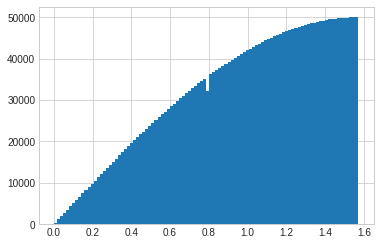

In [531]:
plt.hist(a_sam,100);

In [532]:
mu = 8.21
sigma = 0.21
s = np.random.normal(mu, sigma, int(1e6))
B_sim_chris = 10**s
x = np.linspace(min(B_sim_chris), max(B_sim_chris), int(4e3))
p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
B_sam = []
for i in range(len(x)):
    B_sam += [x[i]]*int(len(x)*p[i])

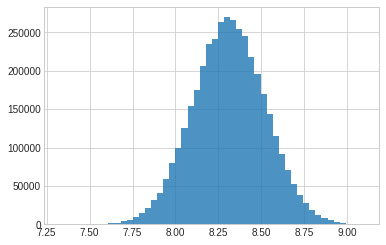

In [533]:
# plt.hist(np.log10(B_sim_chris), 50, alpha = 0.5);
# plt.plot(np.log10(x), np.log10(n_*p));
plt.hist(np.log10(B_sam), 50, alpha = 0.8);

In [534]:
gc.collect()

19859

In [535]:
k_bulge, k_disk

(7.75, 18.5)

In [862]:
dt = 1e7
t_end = 16e9
accretion = True
# accretion = False
# dist_disk = call_distributions(ehists_disk, accretion, dt)
xi = 0.5
ehists = copy.copy(ehists_scratch)
dist1 = call_distributions(aic_indices_bulge)

100%|██████████| 5124/5124 [27:12<00:00,  3.14it/s]

Done!


In [863]:
dNdL_gamma1 = dist1.dNdL_gamma
L_g_noaic1 = dist1.L_g_noaic
dNdL_x1 = dist1.dNdL_x
dNdL_xwd1 = dist1.dNdL_xwd
dNdL_xns1 = dist1.dNdL_xns
Power1 = dist1.Power
P1 = dist1.P_dist
Pdot1 = dist1.P_dot_dist
B1 = dist1.B_dist
birthtimes1 = dist1.birthtimes
detectable1 = dist1.detectable
t_aic1 = dist1.t_aic
Lx_count1 = dist1.Lx_count
Edot1 = dist1.Edot
Pbirth1 = dist1.Pbirth
taic1 = dist1.t_aic
flags1 = dist1.brake_flags
redbacks1 = dist1.redbacks
blackwidows1 = dist1.blackwidows

In [171]:
ti = 138
np.savetxt( "L_P_Pdot_B_acc-xi05_bulge.txt",np.column_stack((dNdL_gamma1[ti], P1[ti], Pdot1[ti], B1[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [855]:
ti = 138
np.savetxt( "L_dist.txt", dNdL_gamma1[ti], fmt = '%.7e' ) 

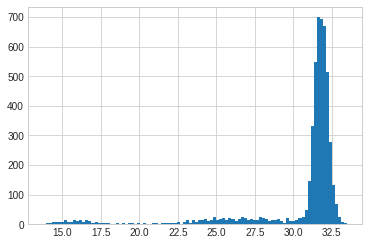

In [859]:
y = np.loadtxt("L_dist.txt")
plt.hist(np.log10(y),100);

In [549]:
len(ehists_mod)

61097

In [882]:
dt = 1e8
t_end = 16e9
accretion = True
# accretion = False
xi = 0.5
ehists = copy.copy(ehists_disk)
dist2 = call_distributions(aic_indices_disk)

100%|██████████| 5124/5124 [01:57<00:00, 43.65it/s]

Done!


In [883]:
dNdL_gamma2 = dist2.dNdL_gamma
L_g_noaic2 = dist2.L_g_noaic
dNdL_x2 = dist2.dNdL_x
dNdL_xwd2 = dist2.dNdL_xwd
dNdL_xns2 = dist2.dNdL_xns
Power2 = dist2.Power
P2 = dist2.P_dist
Pdot2 = dist2.P_dot_dist
B2 = dist2.B_dist
birthtimes2 = dist2.birthtimes
detectable2 = dist2.detectable
t_aic2 = dist2.t_aic
Lx_count2 = dist2.Lx_count
Edot2 = dist2.Edot
taic2 = dist2.t_aic
flags2 = dist2.brake_flags

In [189]:
ti = 138
np.savetxt( "L_P_Pdot_B_acc-xi05_bulge.txt",np.column_stack((dNdL_gamma2[ti], P2[ti], Pdot2[ti], B2[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

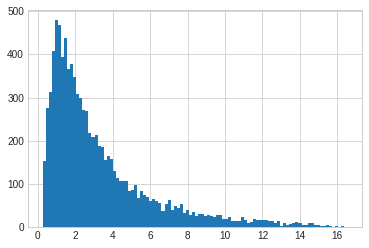

In [660]:
n, bins, _ = plt.hist(np.array(taic2)/1e3, 100)
# plt.xlim(0,14)

In [663]:
bins[83], n[83]*k_bulge

(13.761649999999999, 77.5)

In [1302]:
dt = 1e8
t_end = 16e9
accretion = True
# accretion = False
xi = 0.5
ehists = copy.copy(ehists_scratch)
dist3 = call_distributions(aic_indices_bulge)

100%|██████████| 5124/5124 [02:50<00:00, 30.03it/s]

Done!


In [182]:
dNdL_gamma3 = dist3.dNdL_gamma
L_g_noaic3 = dist3.L_g_noaic
dNdL_x3 = dist3.dNdL_x
dNdL_xwd3 = dist3.dNdL_xwd
dNdL_xns3 = dist3.dNdL_xns
Power3 = dist3.Power
P3 = dist3.P_dist
Pdot3 = dist3.P_dot_dist
B3 = dist3.B_dist
birthtimes3 = dist3.birthtimes
detectable3 = dist3.detectable
t_aic3 = dist3.t_aic
Lx_count3 = dist3.Lx_count
Edot3 = dist3.Edot

In [371]:
ti = 138
np.savetxt( "L_P_Pdot_B_acc-xi14_disk.txt",np.column_stack((dNdL_gamma3[ti], P3[ti], Pdot3[ti], B3[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [188]:
dt = 1e8
t = np.arange(0, 14e9, dt)
np.savetxt( "Edot_SSP.txt", np.column_stack((t/1e9, E_dot3[:140], L_gamma3[:140])),
           fmt=['%.1f', '%.7e', '%.7e'], delimiter="\t\t" )

In [427]:
dt = 1e8
t_end = 16e9
# accretion = True
accretion = False
B_sim = B_sim_chris
xi = 1.4
ehists = copy.copy(ehists_scratch)
dist4 = call_distributions()

100%|██████████| 5124/5124 [01:02<00:00, 81.94it/s] 

Done!


In [ ]:
dNdL_gamma4 = dist4.dNdL_gamma
L_g_noaic4 = dist4.L_g_noaic
dNdL_x4 = dist4.dNdL_x
dNdL_xwd4 = dist4.dNdL_xwd
dNdL_xns4 = dist4.dNdL_xns
Power4 = dist4.Power
P4 = dist4.P_dist
Pdot4 = dist4.P_dot_dist
B4 = dist4.B_dist
birthtimes4 = dist4.birthtimes
detectable4 = dist4.detectable
t_aic4 = dist4.t_aic
Lx_count4 = dist4.Lx_count
Edot4 = dist4.Edot

In [365]:
ti = 138
np.savetxt( "L_P_Pdot_B_noacc_disk.txt",np.column_stack((dNdL_gamma4[ti], P4[ti], Pdot4[ti], B4[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [470]:
0.82 - 0.05

0.7699999999999999

In [539]:
kt = int(1e9/dt)

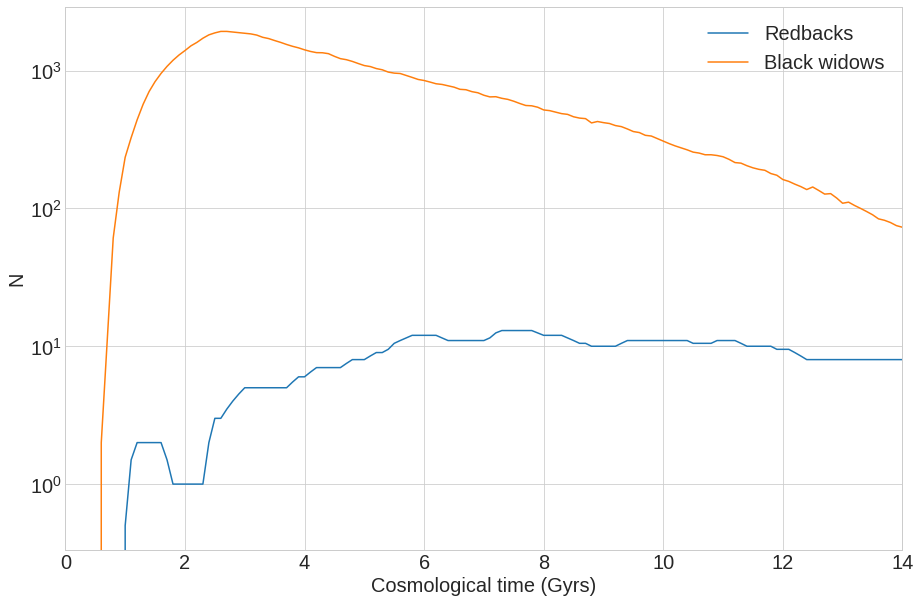

In [449]:
dt = 1e8
t = np.arange(0, 16e9, dt)

plt.figure(figsize=(15,10))

ydata = redbacks1
y_fit = pd.Series(ydata).rolling(window=10, min_periods=0, center=True).median()
plt.semilogy(t/1e9,y_fit, label = "Redbacks")

plt.semilogy(t/1e9,blackwidows1, label="Black widows")
plt.xlim(0,14)
plt.legend(fontsize = 20)
plt.ylabel(r"N",fontsize = 20)
plt.xlabel("Cosmological time (Gyrs)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


### Int-luminosity

In [834]:
dt = 1e8
t = np.arange(0, 15e9, dt)
L_gamma1 = []
count_gamma1 = []
E_dot1 = []
for t_ in t:
    L_gamma1.append( sum(dNdL_gamma1[int(t_/dt)])  )
    count_gamma1.append( sum( np.array(P1[int(t_/dt)]) < 40e-3) )
    E_dot1.append( sum(Edot1[int(t_/dt)]) )
L_gamma1 = np.array(L_gamma1)*k_bulge


dt = 1e8
t = np.arange(0, 15e9, dt)
L_gamma2 = []
count_gamma2 = []
E_dot2 = []
for t_ in t:
    L_gamma2.append( sum(dNdL_gamma2[int(t_/dt)])  )
    count_gamma2.append( sum( np.array(P2[int(t_/dt)]) < 40e-3) )
    E_dot2.append( sum(np.array(Edot2[int(t_/dt)])) )
L_gamma2 = np.array(L_gamma2)*k_bulge

# dt = 1e8
# t = np.arange(0, t_end, dt)
# L_gamma3 = []
# count_gamma3 = []
# E_dot3 = []
# for t_ in t:
#     L_gamma3.append( sum(dNdL_gamma3[int(t_/dt)])  )
#     count_gamma3.append( sum( np.array(P3[int(t_/dt)]) < 40e-3) )
#     E_dot3.append( sum(Edot3[int(t_/dt)]) )
# L_gamma3 = np.array(L_gamma3)*k_bulge

# dt = 1e8
# t = np.arange(0, t_end, dt)
# L_gamma4 = []
# count_gamma4 = []
# E_dot4 = []
# for t_ in t:
#     L_gamma4.append( sum(dNdL_gamma4[int(t_/dt)])  )
#     count_gamma4.append( sum( np.array(P4[int(t_/dt)]) < 40e-3) )
#     E_dot4.append( sum(Edot4[int(t_/dt)]) )
# L_gamma4 = np.array(L_gamma4)*k_bulge

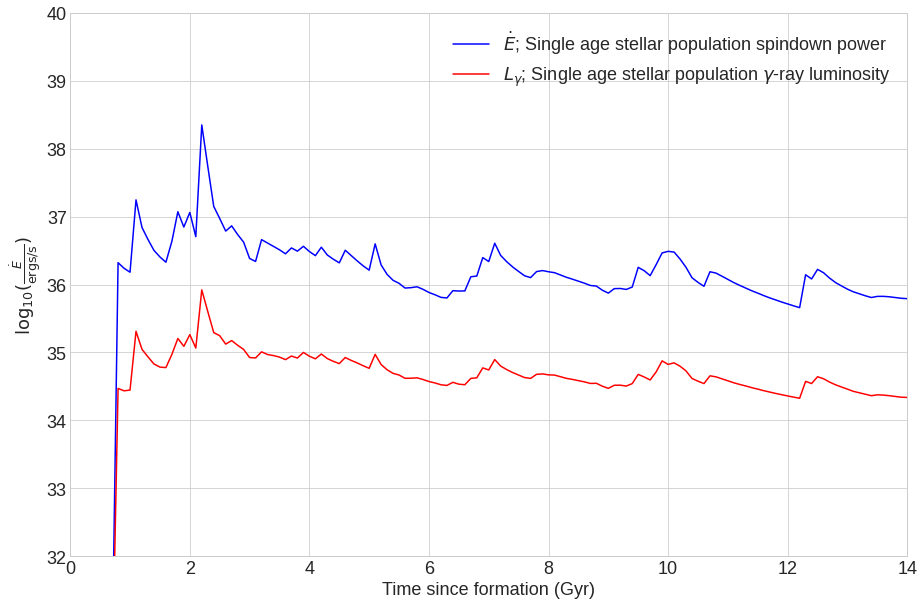

In [162]:
def Edot_plot(E_dot, L_gamma, k):
    t = np.arange(0, t_end, dt)
    plt.figure( figsize = (15,10) )
#     plt.scatter(t/1e9, np.log10(E_dot), 1)
#     plt.plot(t/1e9, np.log10(E_dot), label='Simulated population')
#     plt.scatter(t/1e9, np.log10(E_dot*k), 1)
#     plt.plot(t/1e9, np.log10(E_dot*k), label='Scaled Bulge population')
    plt.ylabel(r'$\log_{10}(\frac{\dot{E}}{\rm{ergs/s}})$', fontsize=18)
    plt.xlabel('Time since formation (Gyr)', fontsize=18)
#     plt.title('Spindown Power', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0,14)
    plt.ylim(32,40)


    xdata = (t/1e9)
    ydata = E_dot
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
#     plt.plot(t/1e9, np.log10(y_fit), 'b-', label='Estimated Bulge population total spindown power')
    plt.plot(t/1e9, np.log10(y_fit), 'b-', label='$\dot{E}$; Single age stellar population spindown power')
    
    ydata = L_gamma/k
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    plt.plot(t/1e9, np.log10(y_fit), 'r-', label='$L_{\gamma}$; Single age stellar population $\gamma$-ray luminosity')
    
    plt.legend(fontsize=18, loc="upper right")
#     plt.savefig("spindown_power.pdf")
    plt.show()

    
dt = 1e8
t = np.arange(0, t_end, dt)
Edot_plot(np.array(E_dot2), np.array(L_gamma2), k_bulge)

In [53]:
print("Total spindown energy released (t=0 to t=14 Gyrs) = ", sum(E_dot1))

Total spindown energy released (t=0 to t=14 Gyrs) =  7.47147278639e+40


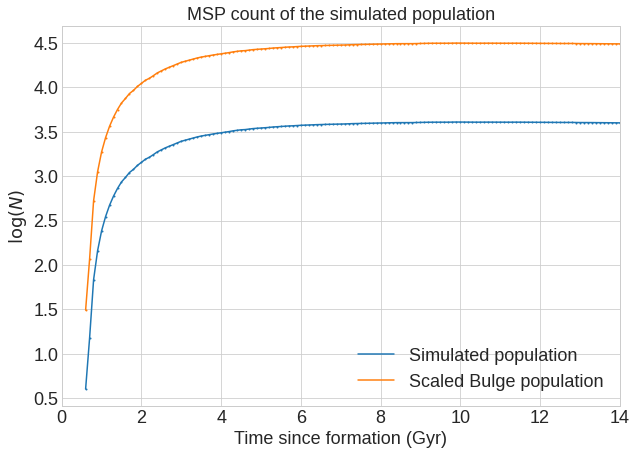

In [182]:
def msp_count(count_msp_sim, k):
    t = np.arange(0, t_end, dt)
    plt.figure( figsize = (10,7) )
    plt.scatter(t/1e9, np.log10(count_msp_sim), 1)
    plt.plot(t/1e9, np.log10(count_msp_sim), label='Simulated population')
    plt.scatter(t/1e9, np.log10(count_msp_sim*k_bulge), 1)
    plt.plot(t/1e9, np.log10(count_msp_sim*k_bulge), label='Scaled Bulge population')
    plt.ylabel('$\log (N)$', fontsize=18)
    plt.xlabel('Time since formation (Gyr)', fontsize=18)
    plt.title('MSP count of the simulated population', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0,14)
    plt.legend(fontsize=18)
#     plt.savefig("msp_pop.pdf")
    plt.show()
    
dt = 1e8
t = np.arange(0, t_end, dt)
msp_count(np.array(count_gamma1), k_bulge)

In [75]:
count_gamma1[140]*k_bulge

14193.35

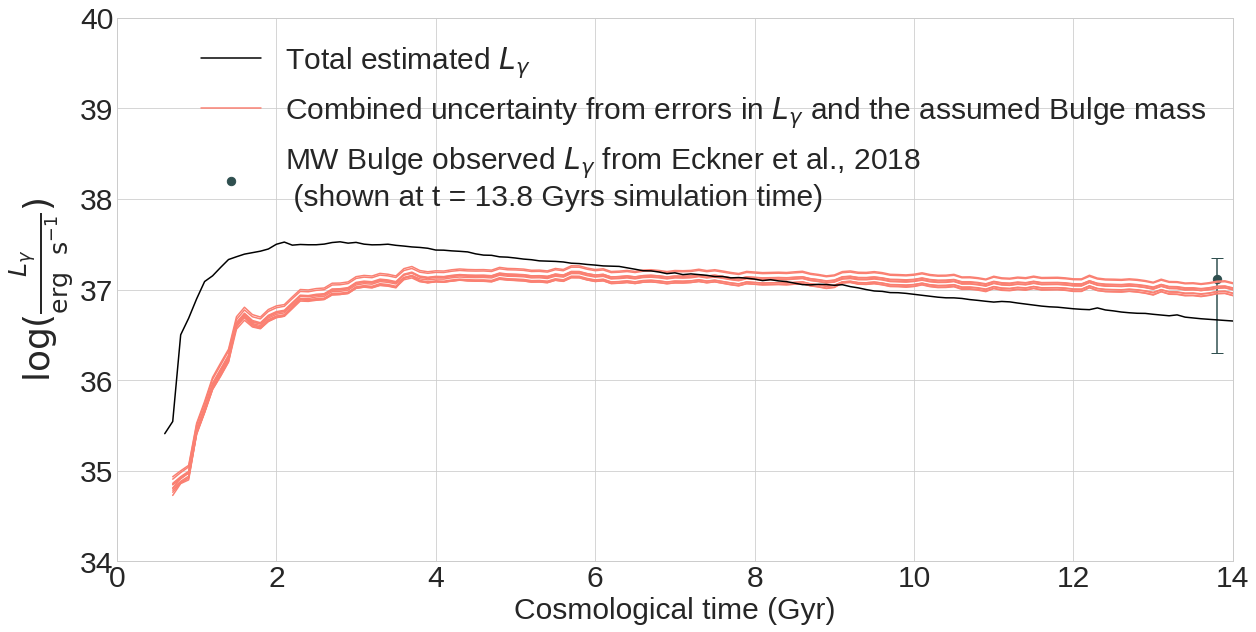

In [945]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin+12.17,xmax-2], [ymin,ymax], c = c, alpha = 1, label = label, zorder=0)
    ax.add_line(l)
    return l

def add_sub_plot(Lg_obs, u, l, c, label, ax):

    xdata = (t/1e9)
    ydata = L_int
    y_fit = pd.Series(ydata).rolling(window=2, min_periods=0, center=True).median()
#     ax.plot(t/1e9, np.log10(y_fit), c='indigo', label = r'Integrated $L_\gamma$ moving median', zorder=10)
    L_gint = y_fit
    t_agree_gamma = interpolate.InterpolatedUnivariateSpline(t/1e9, y_fit-Lg_obs).roots()[0:]
#     t_agree_gamma = [(t/1e9)[ find_nearest(y_fit, Lg_obs) ]]
    y_new = [np.log10(Lg_obs)]*len(t_agree_gamma)
#     print(t_agree_gamma)
    err = np.array([[np.log10(Lg_obs)-l, u-np.log10(Lg_obs)]]*len(t_agree_gamma)).T
    line = newline( [t_agree_gamma[0], y_new[0]], [t_agree_gamma[-1], y_new[-1]], ax,
                c=c, label=label)
    ax.fill_between(line.get_data()[0], l, u, alpha = 0.3, edgecolor=c, facecolor=c, linewidth=1,
                     label = label, zorder=1)
    plt.xlim(0,15)
    plt.ylim(34,40)
    
    return L_gint


plt.figure( figsize = (20,10) )
# plt.plot(t/1e9, np.log10(L_int), c="salmon", ms=3)
plt.ylabel(r'$\log( \frac{L_{\gamma}}{\rm{erg\ \ s^{-1}}})$', fontsize=36)
plt.xlabel('Cosmological time (Gyr)',fontsize=30)



# dt = 1e8
# t = np.arange(0, 15e9, dt)
# xdata = (t/1e9)
# f, alpha, beta = 0.0122, -2.12, 0.82 
# L_int = []
# for time in range(150):
#     L_gamma = 6.8172e35 * f * (np.array(P1[time])/1e-3)**alpha * (np.array(Pdot1[time])/1e-20)**beta
#     L_int.append(sum(L_gamma)*k_bulge)
# ydata = np.array(L_int)
# # plt.plot(t/1e9, np.log10(ydata), c="blue", ms=3)
# y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
# y_line = plt.plot(t/1e9, np.log10(y_fit), c='black', label = r'Total estimated $L_\gamma$', zorder=3)
# # y_fit_u = y_fit * (2.3e10/M_sim) / k_bulge
# # y_fit_l = y_fit * (1.7e10/M_sim) / k_bulge
# # y_fit_u = y_fit * (1.7e10/M_bulge)
# # y_fit_l = y_fit * (1.4e10/M_bulge)
# # plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
# #                      label = "Error in the integrated gamma-ray luminosity due to bulge mass uncertainties")


dt = 1e8
t = np.arange(0, 15e9, dt)
xdata = (t/1e9)
ydata = np.array(L_gamma2)
L_int = ydata
y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
y_line = plt.plot(t/1e9, np.log10(y_fit), c='black', label = r'Total estimated $L_\gamma$', zorder=3)
# y_fit_u = y_fit * (1.7e10/M_bulge)
# y_fit_l = y_fit * (1.4e10/M_bulge)
# plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
#                      label = "Error in the integrated gamma-ray luminosity due to bulge mass uncertainties")



# dt = 1e8
# t = np.arange(0, t_end, dt)
# xdata = (t/1e9)
# ydata = np.array(L_gamma3)
# L_int = ydata
# y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
# y_line = plt.plot(t/1e9, np.log10(y_fit), c='green', label = r'Integrated $L_\gamma$: Accretion after AIC, $\xi = 1.4$')
# # y_fit_u = y_fit * (1.7e10/M_bulge)
# # y_fit_l = y_fit * (1.4e10/M_bulge)
# # plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
# #                      label = "Error in the integrated gamma-ray luminosity due to bulge mass uncertainties")

# dt = 1e8
# t = np.arange(0, t_end, dt)
# xdata = (t/1e9)
# ydata = np.array(L_gamma4)
# L_int = ydata
# y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
# y_line = plt.plot(t/1e9, np.log10(y_fit), c='black', label = r'Integrated $L_\gamma$: No accretion')
# # y_fit_u = y_fit * (1.7e10/M_bulge)
# # y_fit_l = y_fit * (1.4e10/M_bulge)
# # plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
# #                      label = "Error in the integrated gamma-ray luminosity due to bulge mass uncertainties")


L_int = np.array(L_gamma1)
y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
Lg_obs = 1.3e37     ## erg/s     ###eckner
u = np.log10(Lg_obs + 0.9e37)
l = np.log10(Lg_obs - 1.1e37)
plt.scatter(13.8, np.log10(Lg_obs), 70, color="darkslategray", label="MW Bulge observed $L_\gamma$ from Eckner et al., 2018 \n (shown at t = 13.8 Gyrs simulation time)")
c = np.array([[np.log10(Lg_obs) - l ,-(np.log10(Lg_obs) - u)]]).T
plt.errorbar(13.8, np.log10(Lg_obs), yerr=c, linestyle="None", color="darkslategray", capsize=6)
# L_gint = add_sub_plot(Lg_obs, u, l, "olive", r"Time of interest", plt)

# L_int = np.array(L_gamma1)
# y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
# Lg_obs = 0.76e37     ## erg/s     Ploeg et al. (2017)
# u = np.log10(Lg_obs + 0.76e37)
# l = np.log10(Lg_obs - 0.38e37)
# L_gint = add_sub_plot(Lg_obs, u, l, "red", r"MW Bulge observed $L_\gamma$ (Ploeg et al. 2017)", plt)

# L_int = np.array(L_gamma1)
# y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
# Lg_obs = 0.16e37     ## erg/s     Bartels et al. (2017)
# u = np.log10(Lg_obs + 2.35e37)
# l = np.log10(Lg_obs - 0.07e37)
# L_gint = add_sub_plot(Lg_obs, u, l, "blue", r"MW Bulge observed $L_\gamma$ (Bartels et al. 2017)", plt)


f_list = np.arange(0.011, 0.0134, 0.000001)
alpha_list = np.arange(-2.22, -2.02, 0.0001)
beta_list = f_list = np.arange(0.011, 0.0134, 0.000001)
alpha_list = np.arange(-2.22, -2.02, 0.0001)
beta_list = np.arange(0.77, 0.87, 0.0001)
k_bulge_list = np.arange(1.4e10, 1.7e10, 1e8)/2e9

dt = 1e8
t = np.arange(0, 15e9, dt)

for i in range(10):
    L_int = []
    
    f, alpha, beta = np.random.choice(f_list), np.random.choice(alpha_list), np.random.choice(beta_list)        ##slot-gap two-pole caustic (TPC) Gonthier 2018
    k_bulge = np.random.choice(k_bulge_list)
    for time in range(0,150,1):
        L_gamma = 6.8172e35 * f * (np.array(P2[time])/1e-3)**alpha * (np.array(Pdot2[time])/1e-20)**beta
        L_int.append(sum(L_gamma)*k_bulge)
    plt.plot(t/1e9, np.log10(L_int), alpha = 1, c="salmon", label = r"Combined uncertainty from errors in $L_\gamma$ and the assumed Bulge mass")
    


plt.xlim(0,14)
plt.ylim(34,40)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("gamma_int_comp.pdf")
plt.show()

### X-ray plots

In [926]:
M_bulge = 1.55e10
# M_sim = 7.3e8
M_sim = 2e9
k_bulge = M_bulge/M_sim

In [931]:
dt = 1e7
t = np.arange(0, 15e9, dt)
L_x_int1 = []
countx1 = []
etalist = np.arange(0.01, 0.6, 0.0001)
for t_ in t:
    eta = np.random.choice(etalist, len(dNdL_x1[int(t_/dt)]))
    L_x_int1.append( sum(dNdL_x1[int(t_/dt)]*eta)  )
    countx1.append( sum(np.array(dNdL_x1[int(t_/dt)])*2>1e36) )
L_x_int1 = np.array(L_x_int1)*k_bulge

    
dt = 1e8
t = np.arange(0, 15e9, dt)
L_x_int2 = []
countx2 = []
for t_ in t:
    L_x_int2.append( sum(dNdL_x2[int(t_/dt)])  )   
    countx2.append( sum(np.array(dNdL_x2[int(t_/dt)])*2>1e36) )
    
L_x_int2 = np.array(L_x_int2)*k_bulge

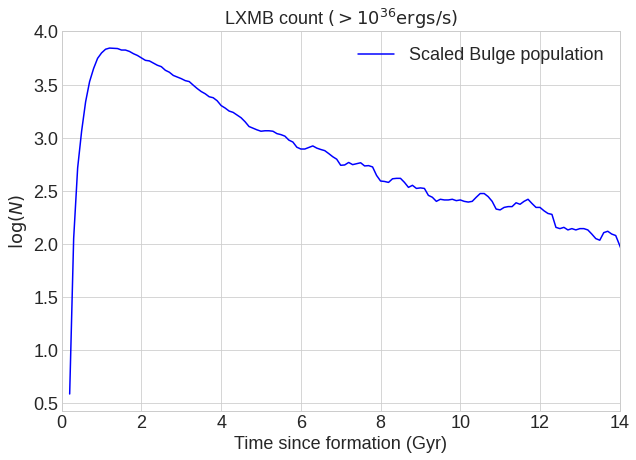

In [163]:
def msp_count(count_sim, k):
    t = np.arange(0, t_end, dt)
    plt.figure( figsize = (10,7) )
#     plt.scatter(t/1e9, np.log10(count_sim), 1)
#     plt.plot(t/1e9, np.log10(count_sim), label='Simulated population')
#     plt.scatter(t/1e9, np.log10(count_sim*k_bulge), 1)
#     plt.plot(t/1e9, np.log10(count_sim*k_bulge), label='Scaled Bulge population')
    plt.ylabel('$\log (N)$', fontsize=18)
    plt.xlabel('Time since formation (Gyr)', fontsize=18)
    plt.title(r'LXMB count $(>10^{36} \rm{ergs/s})$', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)


    xdata = (t/1e9)
    ydata = count_sim*k_bulge
    y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).mean()
    plt.plot(t/1e9, np.log10(y_fit), 'b-', label='Scaled Bulge population')
    plt.legend(fontsize=18)
    plt.xlim(0,14)
#     plt.savefig("LMXB_pop.pdf")
    plt.show()
    
dt = 1e8
t = np.arange(0, t_end, dt)
# msp_count(np.array(Lx_count2), k_bulge)
msp_count(np.array(countx2), k_bulge)

0.0 0.0


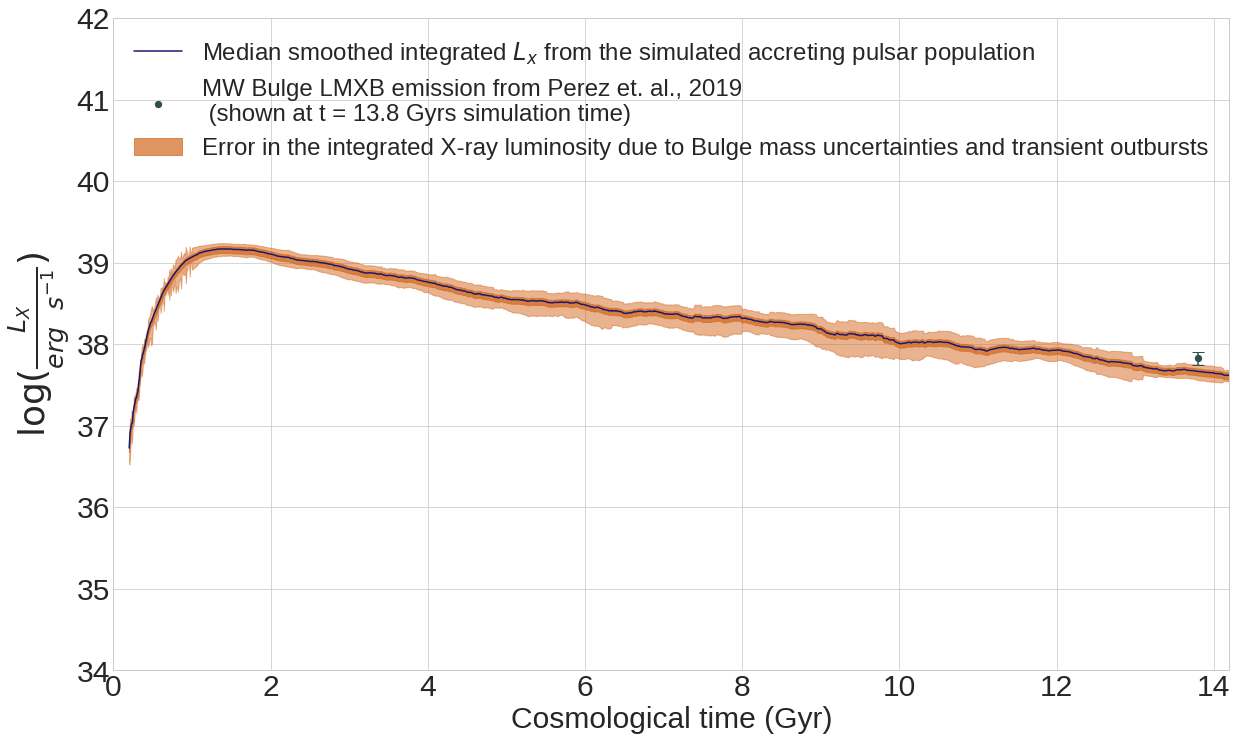

In [1121]:
c = np.array(np.array(L_x_int1)).copy()
L = c
L_orig = c
# f = 1
# L = [c[i] for i in range(len(c)) if i%f==0 ]
# t = np.arange(0, t_end, dt*f)
dt = 1e7
t = np.arange(0, 15e9, dt)

plt.figure( figsize = (20,12) )
# plt.plot(t/1e9, np.log10(L), '-o', c="salmon", ms=2, linewidth = 1, zorder=1, alpha = 0.7)
plt.ylabel(r'$\log( \frac{L_{X}}{erg\ \ s^{-1}})$', fontsize=36)
plt.xlabel('Cosmological time (Gyr)', fontsize=30)
# plt.title('Integrated X-ray luminosity of the simulated population', fontsize=18)
# plt.show()


xdata = (t/1e9)
ydata = L
y_fit = pd.Series(ydata).rolling(window=60, min_periods=0, center=True).mean()
y_fit = np.append(ydata[:20], y_fit[20:])
path_deviation = pd.Series(ydata).rolling(window=60, min_periods=0, center=True).std()
a = []
for i in range(100):
    a.append(y_fit[i]*np.random.random()/2)
path_deviation = pd.Series(np.append(a, path_deviation[100:]))
print(path_deviation[1],a[1])
upper = y_fit+path_deviation
lower = y_fit-path_deviation
plt.fill_between(path_deviation.index/100, np.log10(lower), np.log10(upper), alpha=.5, 
                 edgecolor="chocolate", facecolor="chocolate", linewidth=1) #std curves.
plt.plot(t/1e9, np.log10(y_fit), c='midnightblue', zorder=5, 
         label = r'Median smoothed integrated $L_x$ from the simulated accreting pulsar population')


L = y_fit
# Lx_obs = 1e39     ## erg/s     ###Grimm 2002

Lx_obs = 6.8e+37                  ## Perez 2019, (3.4+-0.3e37) * (2+-0.3e10)

t_agree_x = interpolate.InterpolatedUnivariateSpline(t/1e9, y_fit-Lx_obs).roots()[0:]
y_new = [np.log10(Lx_obs)]*len(t_agree_x)
u = np.log10(Lx_obs + 1.183e+37)
l = np.log10(Lx_obs - 1.183e+37)
err = np.array([[np.log10(Lx_obs)-l, u-np.log10(Lx_obs)]]).T
plt.scatter(13.8, np.log10(Lx_obs), 40, color="darkslategray", label="MW Bulge LMXB emission from Perez et. al., 2019 \n (shown at t = 13.8 Gyrs simulation time)")
plt.errorbar(13.8, np.log10(Lx_obs), yerr=err, linestyle="None", color="darkslategray", capsize=6)
# line = newline( [t_agree_x[0], y_new[0]], [t_agree_x[-1], y_new[-1]],
#                1, "darkslategray", "" )
# plt.fill_between(line.get_data()[0], l, u, alpha = 0.2, edgecolor='darkslategray', facecolor='darkslategray', linewidth=1,
#                  label = r"MW Bulge LMXB emission (Perez et al., 2019)", zorder=1)



dt = 1e7
t = np.arange(0, 15e9, dt)
u = np.log10(L*1.7e10/(M_sim*k_bulge))
l = np.log10(L*1.4e10/(M_sim*k_bulge))
# err = np.array([[np.log10(L)-l, u-np.log10(L)]]).T
plt.fill_between(t/1e9, l, u, alpha = 0.7, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
                     label = "Error in the integrated X-ray luminosity due to Bulge mass uncertainties and transient outbursts")


plt.xlim(0,14.2)
plt.ylim(34,42)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=24)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("L_x_comp.pdf")
plt.show()

L_xint = y_fit

In [1024]:
path_deviation[600]

1.1360868866774242e+38

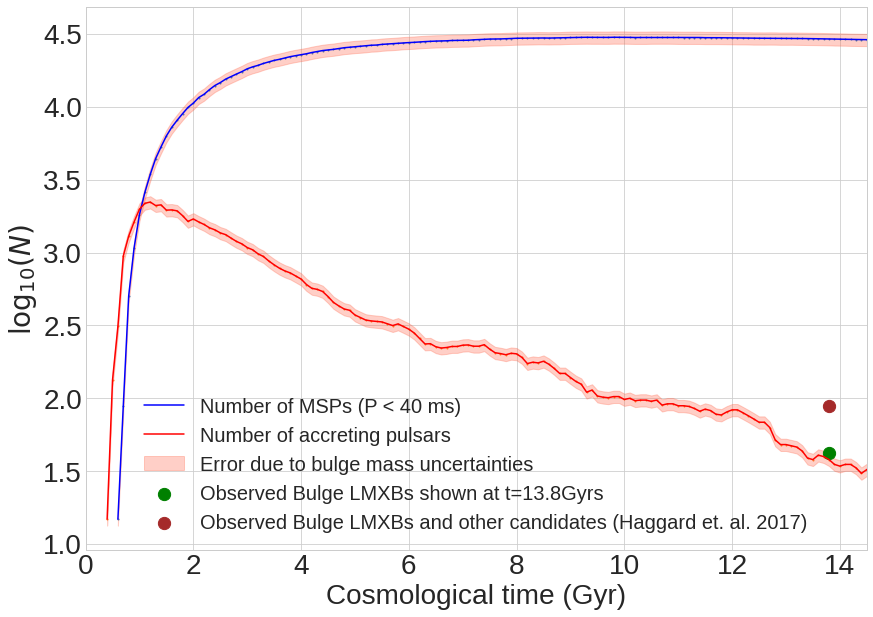

In [618]:
def plot_count(count_msp_sim, count_lmxb, k):
    t = np.arange(0, 15e9, dt)
    plt.figure( figsize = (14,10) )
    plt.scatter(t/1e9, np.log10(count_msp_sim*k_bulge), 1)
    plt.plot(t/1e9, np.log10(count_msp_sim*k_bulge), c="b",label='Number of MSPs (P < 40 ms)', zorder = 3)
    
    ydata = count_msp_sim*k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1,
                         label = "Error due to bulge mass uncertainties")
    
    xdata = (t/1e9)
    ydata = count_lmxb*k_bulge
    y_fit = pd.Series(ydata).rolling(window=8, min_periods=0, center=True).mean()
    ydata = count_lmxb*k_bulge
    y_fit1 = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    y_fit = np.append(y_fit1[:20], y_fit[20:])
    
    plt.scatter(t/1e9, np.log10(y_fit), 1)
    plt.plot(t/1e9, np.log10(y_fit), c="r",label='Number of accreting pulsars', zorder = 3)
    
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)

    plt.scatter(t[138]/1e9, np.log10(42), 150, c="green",label="Observed Bulge LMXBs shown at t=13.8Gyrs")
    plt.scatter(t[138]/1e9, np.log10(88), 150, c="brown",label="Observed Bulge LMXBs and other candidates (Haggard et. al. 2017)")
    
    plt.ylabel('$\log_{10} (N)$', fontsize=28)
    plt.xlabel('Cosmological time (Gyr)', fontsize=28)
#     plt.title('MSP count of the simulated population', fontsize=18)
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlim(0,14.5)
    plt.legend(fontsize=20, loc="lower center")
    plt.savefig("BulgeLMXBandMSPpopulation.pdf")
    plt.show()


    
dt = 1e8
t = np.arange(0, t_end, dt)
plot_count(np.array(count_gamma1), np.array(countx1), k_bulge)

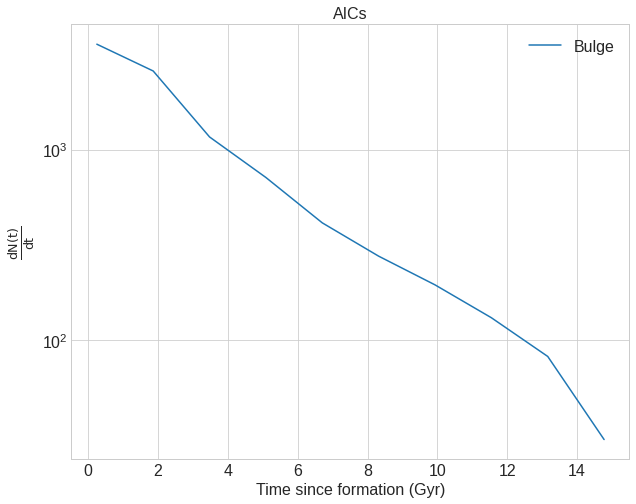

In [139]:
plt.figure(figsize=(10, 8))
n, edges = np.histogram(t_aic1)
plt.semilogy(edges[:-1]/1e3, n, label="Bulge")
# n, edges = np.histogram(t_aic2)
# plt.semilogy(edges[:-1]/1e3, n, label="Bulge")
plt.ylabel(r'$\frac{\rm{d}N(t)}{\rm{d}t}$', fontsize=18)
plt.xlabel('Time since formation (Gyr)', fontsize=16)
plt.title('AICs', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [32]:
min(P1[30])

0.00040730431308481517

In [ ]:
plt.plot(t/1e9,Power1[i])


### $P, \ \dot{P},\ L \ \& \ B$ hist

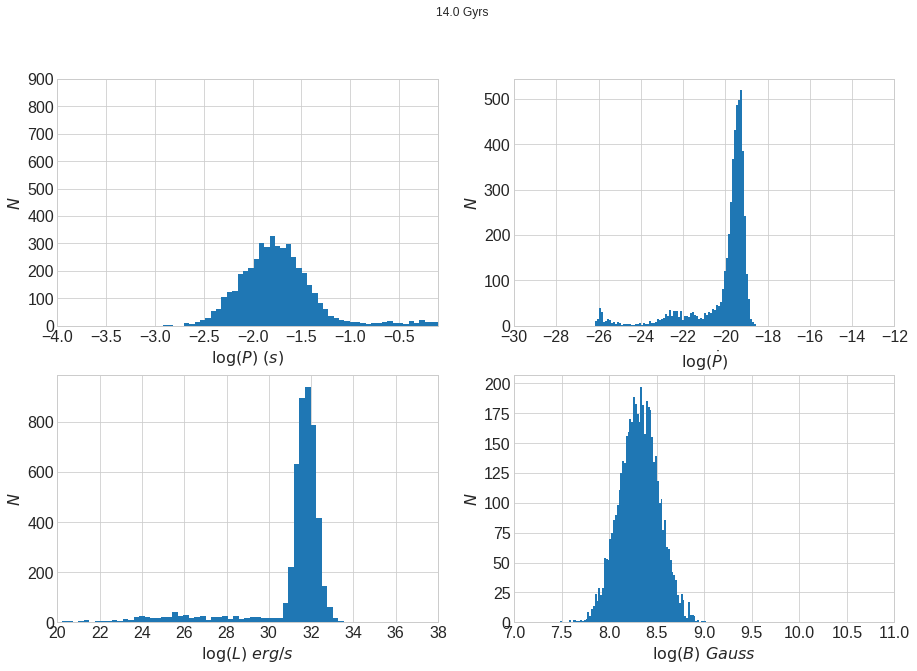

In [163]:
def live_plot(p, p_dot, L, B, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(str(title/kt)+' Gyrs')
    
    plt.subplot(221)
    n, bins, p = plt.hist(np.log10(p), 140)
    plt.xlabel('$\log(P)\ (s)$', fontsize=16)
    plt.ylabel('$ N $', fontsize=16)
    plt.ylim(0, 900)
    plt.xlim(-4, -0.1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(222)
    plt.hist(np.log10(p_dot), 80)
    plt.xlabel(r"$\log(\dot{P})$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(-30,-12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(223)
    plt.hist(np.log10(L), 80)
    plt.xlabel(r"$\log(L) \ erg/s$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(20,38)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(224)
    plt.hist(np.log10(B), 80)
    plt.xlabel(r"$\log(B) \ Gauss$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(7,11)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()

#     plt.savefig("disk_distributions.pdf")
    plt.show()
    
    return
    
# time = 138
# live_plot(P1[time], Pdot1[time], dNdL_gamma1[time], B1[time], (15,10), time)
# live_plot(P2[time], Pdot2[time], dNdL_gamma2[time], B2[time], (15,10), time)
    
for time in range(0, 150, 10):
    live_plot(P1[time], np.array(Pdot1[time]), dNdL_gamma1[time], B1[time], (15,10), time)
    
# for time in range(0,150,10):
#     live_plot(P2[time], np.array(Pdot2[time]), dNdL_gamma2[time], B2[time], (15,10), time)

# for time in range(0, 150, 10):
#     live_plot(P3[time], np.array(Pdot3[time]), dNdL_gamma3[time], B3[time], (15,10), time)

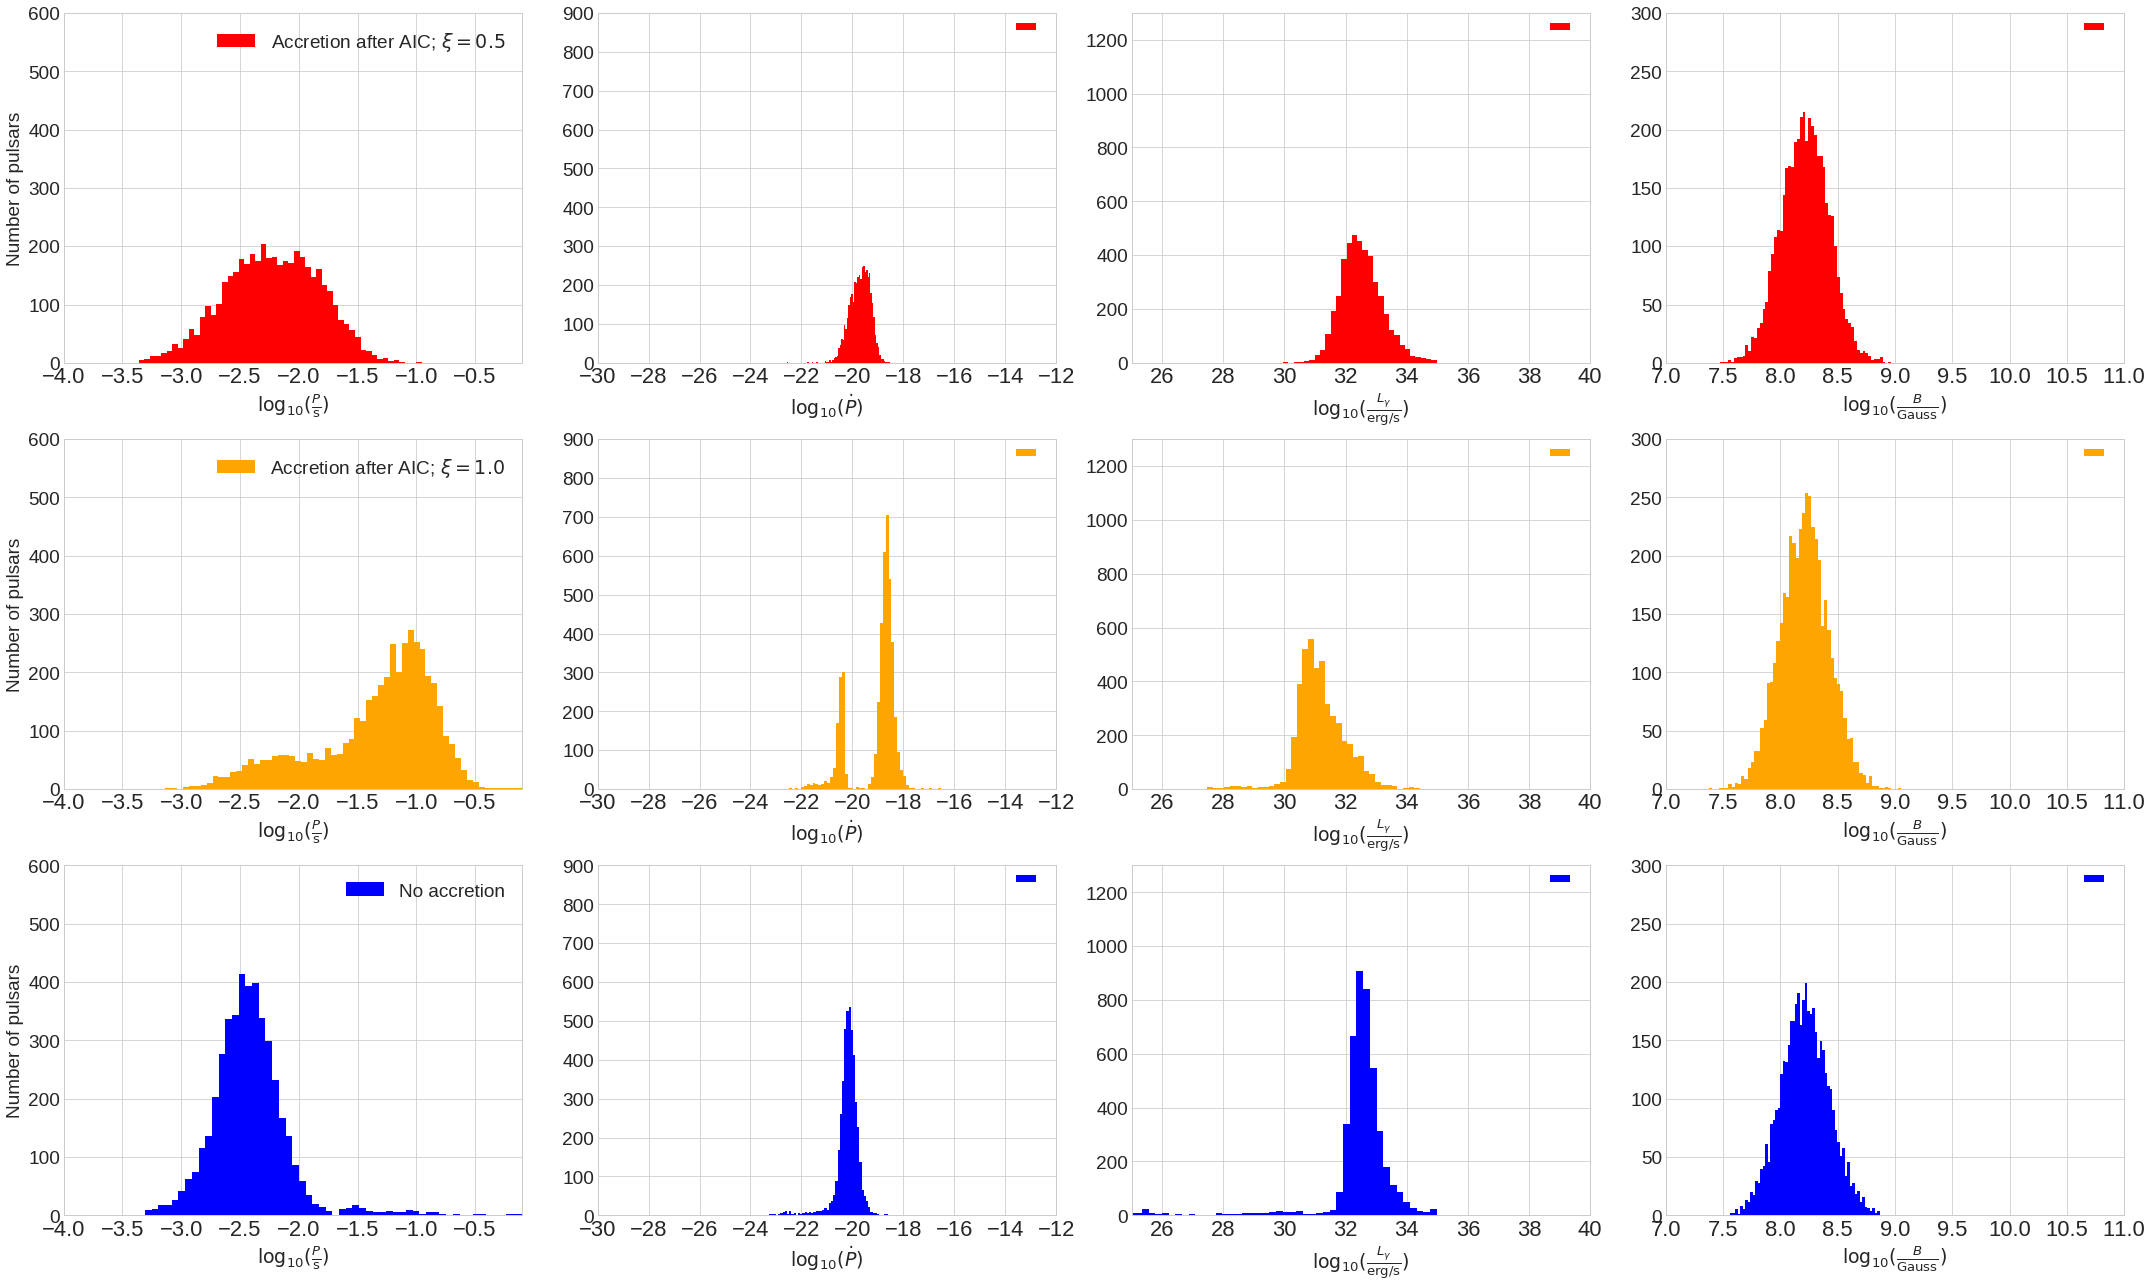

In [361]:
def live_plot( t_sim, figsize=(17,10)):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
#     fig.suptitle(str(t_sim/kt)+' Gyrs', fontsize=19)
    
    plt.subplot2grid((3,4), (0,0))
    plt.hist(np.log10(P1[t_sim]),80, label=r"Accretion after AIC; $\xi = 0.5$", color="red")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
#     plt.ylabel('$ N $')
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,1))
    plt.hist(np.log10(Pdot1[t_sim]), 70, label = ' ', color="red")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,2))
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 60, label = r' ', color="red")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,3))
    plt.hist(np.log10(B1[t_sim]), 60, label = ' ', color="red")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,0))
    plt.hist(np.log10(P3[t_sim]), 80, label = r"Accretion after AIC; $\xi = 1.0$", color="orange")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,1))
    plt.hist(np.log10(Pdot3[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,2))
    plt.hist(np.log10(dNdL_gamma3[t_sim]), 60, label = r' ', color="orange")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,3))
    plt.hist(np.log10(B3[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,0))
    plt.hist(np.log10(P4[t_sim]), 80, label = r"No accretion", color="blue")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,1))
    plt.hist(np.log10(Pdot4[t_sim]), 60, label = ' ', color="blue")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,2))
    plt.hist(np.log10(dNdL_gamma4[t_sim]), 60, label = r' ', color="blue")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,3))
    plt.hist(np.log10(B4[t_sim]), 60, label = ' ', color="blue")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.tight_layout()
    plt.savefig("distributions_comp_disk.pdf")
    plt.show()
    return

    
    
# for time in range(0, 150, 10):
#     live_plot( time, (28,15))

live_plot( 138, (30,18))

In [675]:
fig = plt.figure(figsize=(22,10))
def animate( t_sim):
    plt.clf()
#     fig = plt.figure(figsize=(17,10))
    fig.suptitle(str(t_sim/kt)+r" Gyrs     $\xi = 0.5$")
    
    plt.subplot(241)
    plt.hist(np.log10(P1[t_sim]),80, label=r" ", color="red")
    plt.xlabel('$\log(P)\ (s)$')
    plt.ylabel('$ N $')
    plt.ylim(0, 500)
    plt.xlim(-4, 1)
    plt.legend()
    
    plt.subplot(242)
    plt.hist(np.log10(Pdot1[t_sim]), 70, label = ' ', color="red")
    plt.xlabel(r"$\log(\dot{P})$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(-30,-12)
    plt.legend()
    
    plt.subplot(243)
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 60, label = r' ', color="red")
    plt.xlabel(r"$\log_{10}(L_\gamma)$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    
    plt.subplot(244)
    plt.hist(np.log10(B1[t_sim]), 60, label = ' ', color="red")
    plt.xlabel(r"$\log(B) \ Gauss$")
    plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.legend()
    
    plt.subplot(245)
    plt.hist(np.log10(P2[t_sim]), 80, label = r' ', color="orange")
    plt.xlabel('$\log(P)\ (s)$')
    plt.ylabel('$ N $')
    plt.ylim(0, 500)
    plt.xlim(-4, 1)
    plt.legend()
    
    plt.subplot(246)
    plt.hist(np.log10(Pdot2[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log(\dot{P})$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(-30,-12)
    plt.legend()
    
    plt.subplot(247)
    plt.hist(np.log10(dNdL_gamma2[t_sim]), 60, label = r' ', color="orange")
    plt.xlabel(r"$\log_{10}(L_\gamma)$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(25,40)
    plt.legend()
    
    plt.subplot(248)
    plt.hist(np.log10(B2[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log(B) \ Gauss$")
    plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.legend()
    
    pbar.update()

    
with tqdm(total=150) as pbar:
    FFMpegWriter = manimation.writers['ffmpeg']
    writer = FFMpegWriter(fps=15, bitrate=1800)
    fig = plt.figure(figsize=(16,9))
    v_min = np.log10(min(B_sim_atnf))
    v_max = np.log10(max(B_sim_atnf))
    ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
    ani.save("P_L_Pdot_new_movie.mp4", writer=writer)
    plt.close()

151it [05:18,  2.11s/it]                         


<Figure size 1584x720 with 0 Axes>

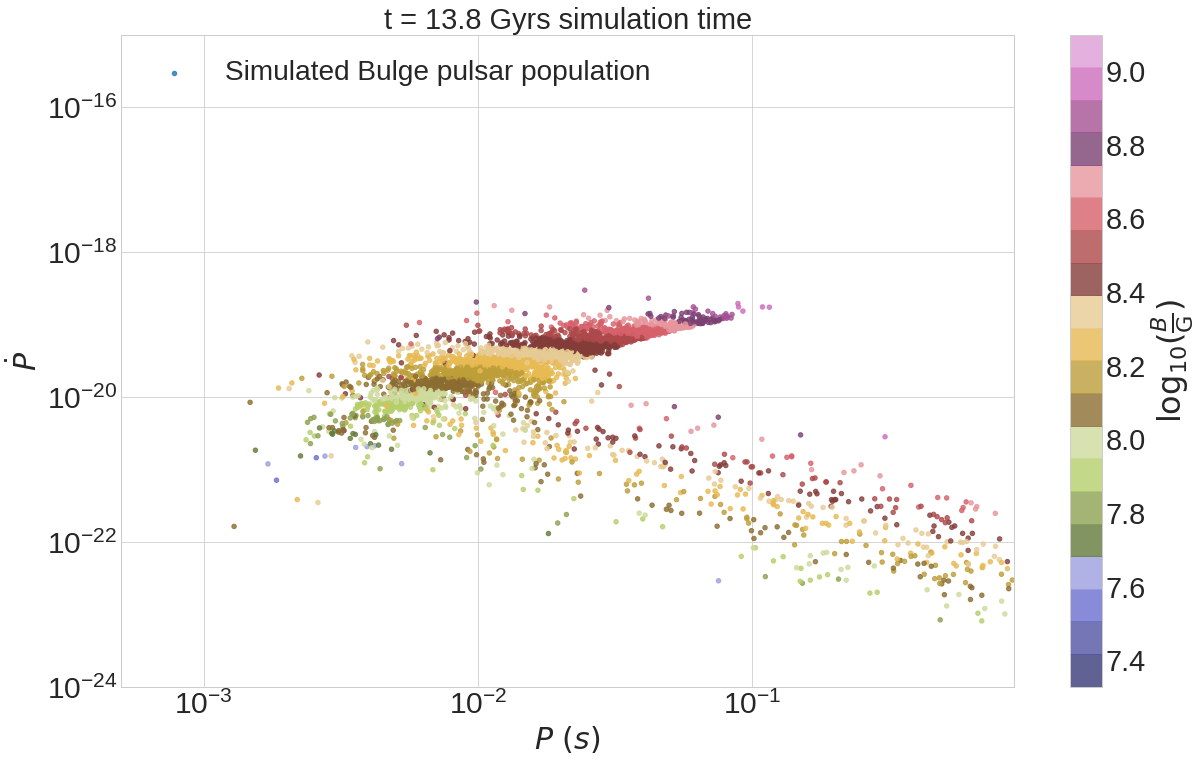

In [852]:
from labellines import labelLine, labelLines
from altair import *

def lp(i,j,c):
    checkL = [True if f==j else False for f in flags1[t_sim]]
    return plt.scatter( np.array(P1[t_sim])[np.array(checkL)], np.array(Pdot1[t_sim])[np.array(checkL)], 10, label="{:s}".format(i), 
                            alpha = 0.5, c=c)


# for t_sim in range(0,150,10):
t_sim = 138
clear_output(wait=True)
fig = plt.figure(figsize=(20,12))

# plt.scatter( atnf["period"].where(atnf["period"]<0.98), atnf["period_dot"].where(atnf["period"]<0.98), 5 , label = "ATNF", alpha = 0.5)

# plt.scatter( atnf["P0"], atnf["P1"], 20 , label = "Observed local MSPs (P < 40ms) from the ATNF catalogue", alpha = 1, color="k", zorder = 3)


if t_sim>0:
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])), alpha = 0.3)
#     plt.scatter( np.array(P1[t_sim])[np.array(P1[t_sim])<40e-3], np.array(Pdot1[t_sim])[np.array(P1[t_sim])<40e-3], 10, alpha = 0.8, label = "Simulated Bulge MSP (P < 40ms) population")
#     plt.scatter( np.array(P2[t_sim])[np.array(P2[t_sim])<40e-3], np.array(Pdot2[t_sim])[np.array(P2[t_sim])<40e-3], 20, alpha = 0.8, label = "Simulated Disk MSP (P < 40ms) population")
#         handles = [lp(i,j,c) for i,j,c in [("Dipole Braking",3,"red"), ("Propeller braking",2,"blue")]]
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])),
#                         alpha = 0.8, c=np.log10(B2[t_sim]), cmap='tab20b', vmin=v_min, vmax=v_max)
    plt.scatter( P1[t_sim], Pdot1[t_sim], 20, label = "Simulated Bulge pulsar population", 
                        alpha = 0.8, c=np.log10(B1[t_sim]), cmap='tab20b', vmin=v_min, vmax=v_max)
#         col2 = ["red" if x==True else "blue" for x in detectable2[t_sim]]
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Simulated Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])), 
#                     alpha = 0.3, c=col2)
#         plt.scatter(0,0, color= red, label="")
#         col1 = ["red" if x==True else "blue" for x in detectable1[t_sim]]
#         plt.scatter( P1[t_sim], Pdot1[t_sim], 10, label = "Disk MSPs | estimated: %i | simulated: %i" %(len(P1[t_sim])*k_disk, len(P1[t_sim])), 
#                     alpha = 0.8, c=col1)
    cbar = plt.colorbar()
    cbar.set_label(r"$\log_{10}(\frac{B}{\rm G})$", fontsize=32)
    cbar.ax.tick_params(labelsize=29)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=28, loc="upper left")
#     plt.legend(handles=handles, fontsize=23, loc="upper left")
plt.xlabel('$P \ (s)$', fontsize=30)
plt.ylabel('$ \dot{P} $', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("t = "+str(t_sim/10)+' Gyrs simulation time', fontsize=29)
plt.ylim(1e-24,1e-15)
plt.xlim(5e-4,0.9)
#     plt.plot(P__, Pdot_1e8, label = r"$10^8$ yrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_1e9, label = r"$10^9$ yrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_14e9, label = r"$14$ Gyrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_spinup, label = r"max spin-up line", color='gray')
#     plt.plot(P__, Pdot_1e9G, label = r"$10^{%0.2f}$ G"%v_min, color='k', alpha =0.5, zorder=2)
# labelLines(plt.gca().get_lines(), zorder=0.9, fontsize=15)

plt.savefig("ppdot.pdf")
plt.show()

(-4.0, 1.0)

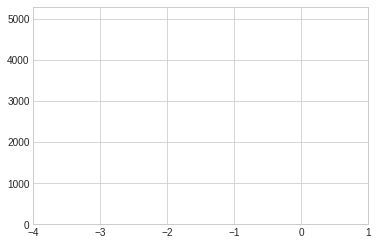

In [316]:
plt.hist(np.log10(np.where(flags1==3, P1[138], 100)))
plt.xlim(-4,1)

In [331]:
max(np.where(flags1[138]==2, 0, P1[138]))

20211.634310515103

In [849]:
v_min = np.log10(min(B_sam))
v_max = np.log10(max(B_sam))

In [268]:
def pdotcal1(p,tau):
    return p/(2*tau* 3.154e+7)
P__ = np.arange(1e-4, 1, 1e-4)
Pdot_1e7 = pdotcal1(P__, 1e7)
Pdot_1e8 = pdotcal1(P__, 1e8)
Pdot_1e9 = pdotcal1(P__, 1e9)
Pdot_14e9 = pdotcal1(P__, 14e9)

In [95]:
def pdotcal2(p,b):
    return (b / 3.1782086e+19)**2 / p
# Pdot_1e7G = pdotcal1(P__, 1e7)
Pdot_1e9G = pdotcal2(P__, 10**v_min)

In [96]:
def spinupline(p):
    return 10**(-15.5)*p
# Pdot_1e7G = pdotcal1(P__, 1e7)
Pdot_spinup = spinupline(P__)

20211.634310515103

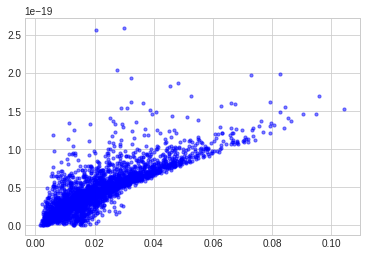

In [361]:
checkL = np.array([True if f==2 else False for f in flags1[138]])
plt.scatter( np.array(P1[138])[checkL], np.array(Pdot1[138])[checkL], 10, label="{:s}".format("A"), 
                            alpha = 0.5, c="blue")

### Movie

In [594]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='P-Pdot_bulge_noacc', artist='Matplotlib',
                comment='-')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)


fig = plt.figure(figsize=(16,9))

def animate(t_sim):
    plt.clf()
    handles = []
    if t_sim>0:
        checkLa = np.array([True if f==2 else False for f in flags1[t_sim]], dtype=bool)
        checkLb = np.array([True if f==3 else False for f in flags1[t_sim]], dtype=bool)
        
        bins=np.histogram(np.log10(dNdL_gamma1[t_sim]), 
                          bins=100)[1] #get the bin edges
        handles.append(plt.scatter( np.array(P1[t_sim])[checkLa], np.array(Pdot1[t_sim])[checkLa], 10, label="Pulsars undergoing propeller braking", 
                            alpha = 0.5))
#         handles.append(plt.hist( np.log10(np.array(dNdL_gamma1[t_sim])[checkLa]), bins=bins, label="Propeller braking", 
#                             alpha = 0.5, color="blue"))
        handles.append(plt.scatter( np.array(P1[t_sim])[checkLb], np.array(Pdot1[t_sim])[checkLb], 10, label="Pulsars undergoing dipole Braking", 
                            alpha = 0.5))
#         handles.append(plt.hist( np.log10(np.array(dNdL_gamma1[t_sim])[checkLb]), bins=bins, label="Dipole Braking", 
#                             alpha = 0.5, color="red"))

        plt.legend(fontsize=20, loc="upper left")
        
#     plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=20)
#     plt.ylabel('$N$', fontsize= 20)
    plt.xlabel('$P \ (s)$', fontsize=20)
    plt.ylabel('$ \dot{P} $', fontsize= 20)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(str(t_sim/kt)+' Gyrs', fontsize=20)
#     plt.ylim(0,800)
#     plt.xlim(20, 40)
    plt.ylim(1e-24,1e-15)
    plt.xlim(1e-4,0.95)
#     plt.plot(P__, Pdot_1e8, label = r"$10^8$ Gyrs", color='k')
#     plt.plot(P__, Pdot_1e9G, label = r"$10^{7.6}$ G", color='k')
#     labelLines(plt.gca().get_lines(), zorder=0.5, fontsize=15)
    
ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
ani.save("PPdot_movie.mp4", writer=writer)
plt.close()

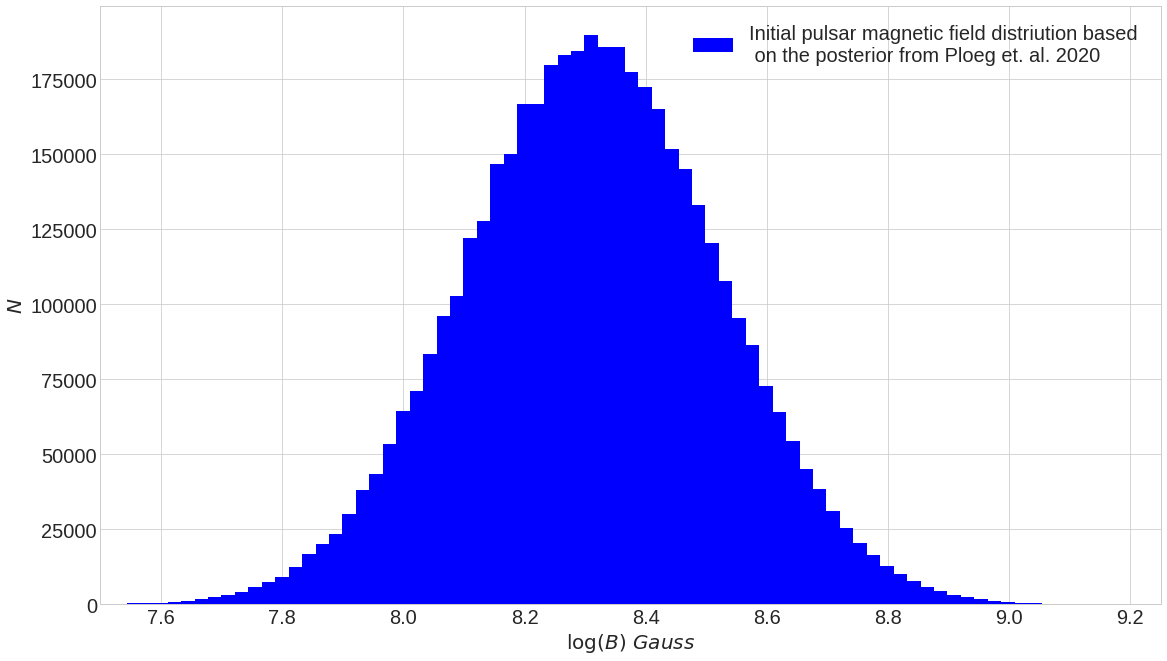

In [529]:
plt.figure(figsize=(19,11))
plt.hist(np.log10(B_sam), 80, label = 'Initial pulsar magnetic field distriution based \n on the posterior from Ploeg et. al. 2020', color="blue")
plt.xlabel(r"$\log(B) \ Gauss$", fontsize=20)
plt.ylabel(r"$N$", fontsize=20)
plt.xlim(7.5,9.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

### Characteristic Age Distribution

In [ ]:
tau = []
for t_sim in range(0,15,1):
    tau.append( np.array(P1[t_sim])/(2*np.array(Pdot1[t_sim])*3.154e+7) )

In [ ]:
for t_sim in range(0,15,1):
    fig = plt.figure(figsize=(16,9))
    clear_output(wait=True)
    plt.hist(np.log10(tau[t_sim]), log=True, bins = 20)
    plt.title(str(t_sim)+' Gyrs')
    plt.ylim(0.1,1e5)
    plt.xlim(4, 14)
    plt.xlabel(r"$log_{10} (\frac{\tau}{\rm{yrs}})$", fontsize=18)
    plt.ylabel(r"$\rm{d}N/\rm{d} \tau $", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [ ]:
find_nearest(tau, -np.inf)

In [ ]:
P2[300][33]

In [ ]:
Pdot2[300][33]

#### Birth-times

In [ ]:
plt.figure(figsize=(10, 8))
n, edges = np.histogram(birthtimes1,100)
plt.semilogy(edges[:-1]/1e3, n, label="Disk")
n, edges = np.histogram(birthtimes2,100)
plt.semilogy(edges[:-1]/1e3, n, label="Bulge")
plt.ylabel(r'$\frac{\rm{d}N(t)}{\rm{d}t}$', fontsize=18)
plt.xlabel('Time since formation (Gyr)', fontsize=16)
plt.title('Binary birth rate', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

### Arbitrary distribution

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    n, bins, p = plt.hist((data),800)
    plt.title(str(title/kt)+' Gyrs')
    plt.xlabel(r"$n$")
    plt.ylabel(r"$N $")
    plt.xlim(0,10)
    plt.show();
    
for time in range(1, 150,10):
    live_plot(dist1.n[time], (12,8), time)

In [110]:
np.mean(dist1.n[137])

3.0150660464994941

## $\gamma$-ray luminosity hist

In [ ]:
fig = plt.figure(figsize=(10,8))
def animate(t_sim):
    plt.clf()
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 70, alpha=0.3, label = "No accretion after AIC")
    plt.hist(np.log10(dNdL_gamma2[t_sim]), 70, alpha=0.3, label = "Accretion after AIC")
    plt.xlim(25, 37)
#     plt.ylim(0, 1000)

    plt.title(str(t_sim/kt)+' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$", fontsize=18)
    plt.ylabel(r"$\frac{\rm{d}\ N}{\rm{d} \ \log_{10} (L_\gamma)} $", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=16)

    

FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)
fig = plt.figure(figsize=(16,9))
v_min = np.log10(min(B_sim_atnf))
v_max = np.log10(max(B_sim_atnf))
ani = manimation.FuncAnimation(fig, animate, frames=1500, repeat=False)
ani.save("L_gamma_dist_movie.mp4", writer=writer)
plt.close()

# for time in range(0, 150, 5):
#     animate(dNdL_gamma1[time], dNdL_gamma2[time], (12,8), time)

In [530]:
t = np.arange(0, t_end, 1e8)
detec = []
y = []
z = []
for time in range(160):
    j = np.log10(dNdL_gamma1[time])
    detec.append( int(sum(i > np.log10(7.36e33) for i in j)*k_bulge) )
    y.append( int(sum(i > 32 for i in j)*k_bulge) )
    z.append( int(sum(i > 0.1 for i in j)*k_bulge) )
    

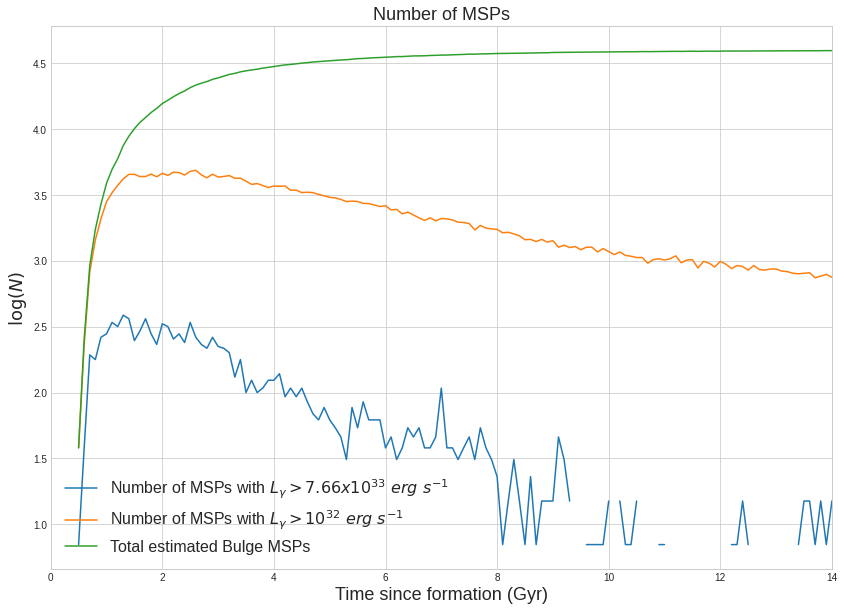

In [531]:
xdata = (t/1e9)
ydata = detec
y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
# plt.plot(t/1e9, np.log10(y_fit), c='midnightblue', zorder=5, label = r'Integrated $L_x$ from the simulated LMXB population')

plt.figure(figsize=(14,10))
plt.plot(t/1e9, np.log10(y_fit), label=r'Number of MSPs with $L_\gamma > 7.66x10^{33}\ erg\ s^{-1}$ ')
plt.plot(t/1e9, np.log10(y), label=r'Number of MSPs with $L_\gamma > 10^{32}\ erg\ s^{-1}$ ')
plt.plot(t/1e9, np.log10(z), label = "Total estimated Bulge MSPs")
plt.ylabel('$\log(N)$',fontsize=18)
plt.xlabel('Time since formation (Gyr)',fontsize=18)
plt.title(r'Number of MSPs',fontsize=18)
plt.legend(fontsize=16)
plt.xlim(0,14)
plt.savefig("Nmsps_noaccaic.pdf")
plt.show()

In [535]:
detec[138]

15

In [ ]:
L_x_int1 = []

In [ ]:
np.where(np.array(dNdL_x2[time])>0, dNdL_x2[time], None)

## X-ray Luminosity distribution

In [313]:
from IPython.display import clear_output

def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    n, bins, p = plt.hist(np.log10(np.where(data>0, dNdL_x2[time], 1)), log=True,  bins = 50)
    
#     n, edges = np.histogram(np.log10(data), 300)
#     plt.scatter( edges[:-1], np.log10(edges[:-1]) )
    plt.xlim(20, 40)
    plt.ylim(1, 4000)

    plt.title(str(title/100)+' Gyrs')
    plt.xlabel(r"$\log(L_X)$")
    plt.ylabel(r"$\log(N) $")
    plt.show();
    
# for time in range(0, 150, 10):
#     live_plot(np.array(dNdL_x1[time]), (12,8), time)

time = 1380
live_plot(np.array(dNdL_x1[time]), (12,8), time)

IndexError: list index out of range

<Figure size 864x576 with 0 Axes>

In [ ]:
def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    n, bins, p = plt.hist(np.log10(data), log=True, bins=60)

#     n, edges = np.histogram(np.log10(data), 300)
#     plt.scatter( edges[:-1], np.log10(edges[:-1]) )
    plt.xlim(25, 40)
#     plt.ylim(0, 350)

    plt.title(str(title)+' Gyrs')
    plt.xlabel(r"$\log(L_X)$")
    plt.ylabel(r"$N $")
    plt.show();
    
for time in range(1, 15):
    live_plot(dNdL_xns[time], (12,8), time)

# time = 12
# live_plot(dNdL_x[time], (12,8), time)

### $P-\dot{P}$ and $\gamma-ray$ Luminosity hists

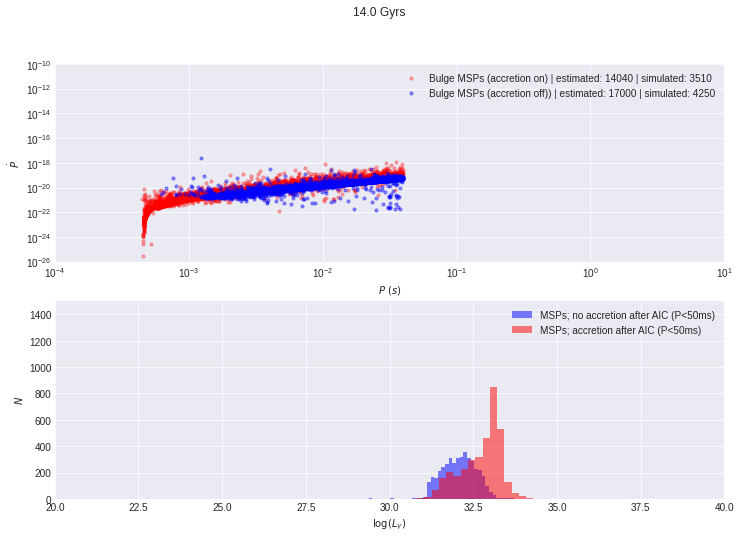

In [220]:
def live_plot( t_sim, figsize=(7,5)):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(str(t_sim/100)+' Gyrs')
    
    plt.subplot(211)
    plt.scatter( P2[t_sim], Pdot2[t_sim], 10, color="red", label = "Bulge MSPs (accretion on) | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])), alpha = 0.3)
    plt.scatter( P1[t_sim], Pdot1[t_sim], 10, color="blue", label = "Bulge MSPs (accretion off)) | estimated: %i | simulated: %i" %(len(P1[t_sim])*k_bulge, len(P1[t_sim])), alpha = 0.4)
    plt.xlabel('$P \ (s)$')
    plt.ylabel('$ \dot{P} $')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.ylim(1e-26,1e-10)
    plt.xlim(1e-4, 1e1)
    
    plt.subplot(212)
    plt.hist(np.log10(dNdL_gamma1[t_sim]),60, alpha = 0.5, label="MSPs; no accretion after AIC (P<50ms)", color="blue")
    plt.hist(np.log10(dNdL_gamma2[t_sim]),60, alpha = 0.5, label="MSPs; accretion after AIC (P<50ms)", color="red")
    plt.xlabel(r"$\log(L_\gamma)$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 1500)
    plt.xlim(20, 40)
    plt.legend()
    plt.show();
    

    
    
for time in range(0, 1500, 100):
    live_plot( time, (12,8))

# time = 1370
# live_plot(np.array(P_dist[time]), np.array(P_dot_dist[time]), np.array(dNdL_gamma[time]), (12,8), time)

In [317]:
br = [i[0] if len(i)>0 else 0 for i in flags1]

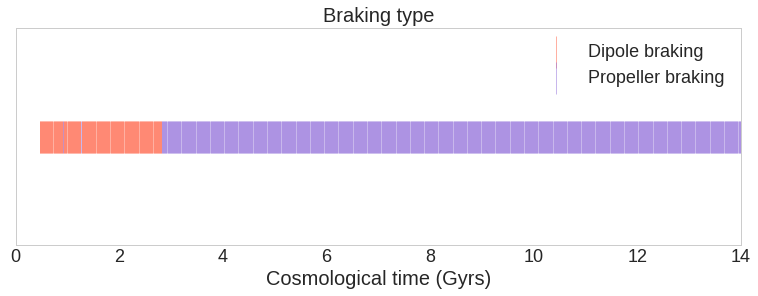

In [318]:
t = np.arange(0, t_end, 1e7)
fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(1,1,1)
fig.canvas.draw()
for i in range(len(br)):
    if br[i] == 2:
        ax.scatter(np.array(t[i])/1e9, 1, marker="|", c="mediumpurple", s=1000, linewidth=0.5, label="Propeller braking", alpha = 1)
    if br[i] == 3:
        ax.scatter(np.array(t[i])/1e9, 1, marker="|", c="tomato", s=1000, linewidth=0.5, label="Dipole braking", alpha = 1)
plt.yticks([1])
ax.grid(False)
ax.set_yticklabels([" "])
plt.xlabel(r"Cosmological time (Gyrs)", fontsize=20)
# plt.ylabel(r"Braking type", fontsize=20)
plt.title(r"Braking type", fontsize=20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18)
plt.xlim(0,14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("braking.pdf")
plt.show()

## $L_\gamma \frac{dN}{dL_\gamma} $

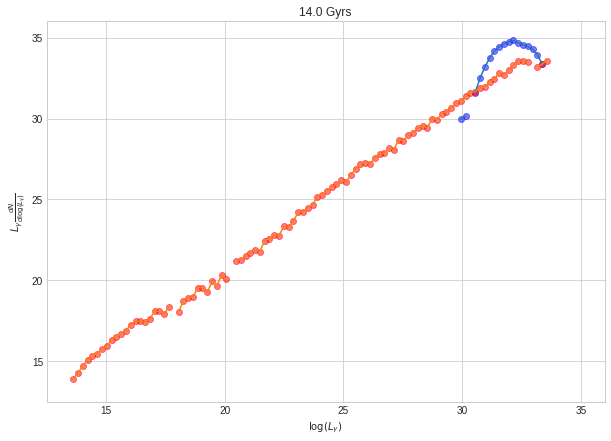

In [484]:
# time = 138
for time in range(0,150,10):
    clear_output(wait=True)
    a = dNdL_gamma1[time]
#     n, edges = np.histogram(np.log10(a),60)
    # print(n, edges)
    checkLa = np.array([True if f==2 else False for f in flags1[time]], dtype=bool)
    checkLb = np.array([True if f==3 else False for f in flags1[time]], dtype=bool)

    bins = np.histogram(np.log10(dNdL_gamma1[time]), 
                      bins=100)[1] #get the bin edges
#         handles.append(plt.scatter( np.array(P1[t_sim])[checkL], np.array(Pdot1[t_sim])[checkL], 10, label="Propeller braking", 
#                             alpha = 0.5, c="blue"))
    plt.figure(figsize=(10,7))
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLa])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Propeller braking", 
                            alpha = 0.5, c="blue")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLb])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Dipole braking", 
                            alpha = 0.5, c="red")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    plt.title(str(time/kt) + ' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$")
    plt.ylabel(r"$L_\gamma\frac{dN}{d \log(L_\gamma)}$")
    # plt.savefig("L dNdL gamma")
    plt.xlim(12.5,36)
    plt.ylim(12.5,36)
    plt.show();

In [20]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='P-Pdot_bulge_noacc', artist='Matplotlib',
                comment='-')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)


fig = plt.figure(figsize=(16,9))
def animate(time):
    plt.clf()
    handles = []
    checkLa = np.array([True if f==2 else False for f in flags1[time]], dtype=bool)
    checkLb = np.array([True if f==3 else False for f in flags1[time]], dtype=bool)

    bins = np.histogram(np.log10(dNdL_gamma1[time]), 
                      bins=100)[1] #get the bin edges
#         handles.append(plt.scatter( np.array(P1[t_sim])[checkL], np.array(Pdot1[t_sim])[checkL], 10, label="Propeller braking", 
#                             alpha = 0.5, c="blue"))
    
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLa])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Propeller braking", 
                            alpha = 0.5, c="blue")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLb])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Dipole braking", 
                            alpha = 0.5, c="red")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    plt.title(str(time/kt) + ' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$")
    plt.ylabel(r"$L_\gamma\frac{dN}{d \log(L_\gamma)}$")
    # plt.savefig("L dNdL gamma")
    plt.xlim(12.5,36)
    plt.ylim(12.5,36)
    plt.legend()
    
    
ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
ani.save("LdNdL_movie.mp4", writer=writer)
plt.close()

## $L_x \frac{dN}{dL_x} $

In [ ]:
plt.figure(figsize=(16,7))
plt.suptitle("X-ray luminosity function")

time = 13


plt.subplot(121)
a = dNdL_xwd[time]
n, edges = np.histogram(np.log10(a),60)
plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), c='blue' )
xdata = edges[:-1]
ydata = np.log10(n*10**edges[:-1])
y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
plt.plot( edges[:-1], y_fit )
plt.title(str(time) + ' Gyrs')
plt.xlabel(r"$\log(L_x)$")
plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")


plt.subplot(122)
a = dNdL_xns[time]
n, edges = np.histogram(np.log10(a),60)
plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="NSs only" )
# plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
plt.title(str(time) + ' Gyrs')
plt.xlabel(r"$\log(L_x)$")
plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")
plt.legend()

# plt.savefig("L dNdL X")
plt.show();

In [ ]:
for time in range(1, 15):
    clear_output(wait=True)

    plt.figure(figsize=(16,7))
    a = dNdL_xwd[time]
    n, edges = np.histogram(np.log10(a),60)
    plt.scatter( edges[:-1], n, c='blue' )

    a = dNdL_xns[time]
    n, edges = np.histogram(np.log10(a),60)
    plt.scatter( edges[:-1], n, color='red')
    # plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
    
    plt.hist(np.log10(dNdL_xns[time]), 60, alpha = 0.3)
    plt.hist(np.log10(dNdL_xwd[time]), 60, alpha = 0.3)
    plt.title(str(time) + ' Gyrs')
    plt.xlabel(r"$\log(L_x)$")
    plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")
#     plt.xlim(20,42)
#     plt.ylim(20,42)
    plt.show()
    time_module.sleep(0.5)

In [ ]:
a = dNdL_xns[1]
np.log10(a)*np.log10(np.exp(1))

In [ ]:
edges

#### Power

In [ ]:
t = np.arange(0, t_end, 1e9)
plt.figure( figsize = (8,5) )
# plt.scatter(t/1e9, np.log10(count_msp), 1)
plt.plot(t/1e9, Power)
plt.ylabel('Power')
plt.xlabel('(Time since formation (Gyr) )')
plt.show()

### Sim vs. Obs

In [1151]:
data = np.genfromtxt("bulge_data.csv", delimiter=',')    ## galactic longitude, latitude, distance, flux, and luminosity

In [1135]:
bulge = np.genfromtxt("bulge_luminosity_hist_data.csv", delimiter=',')
disk = np.genfromtxt("disk_luminosity_hist_data.csv", delimiter=',')

In [1152]:
F = data[:,3]
L = data[:,4]

In [840]:
# atnf = pd.read_csv("atnf_pulsar_cat.txt", sep=";")
atnf = pd.read_csv("atnf_bin_msps.txt", sep=";")
data_ = pd.read_csv("fermi_4fgl.txt",sep='|')
F_fermi4fgl = data_['energy_flux'].astype(float)

In [100]:
L_atnf = []
for i in range(0, len(atnf['EDOT'])):
    if atnf['P0'][i]<40e-3:
        L_atnf.append(atnf['EDOT'][i]*0.1)
P = []    
for i in range(0, len(atnf['P0'])):
    if atnf['P0'][i]<40e03:
        P.append(atnf['P0'][i])
        
B = []    
for i in range(0, len(atnf['P0'])):
    if atnf['P0'][i]<40e03:
        B.append(atnf['BSURF'][i])


In [101]:
shape, loc, scale = lognorm.fit(atnf["BSURF"])
B_sim_atnf = lognorm(shape, loc=loc, scale=scale).rvs(size=int(0.095*1e5))

In [810]:
E = np.arange(1, 1e5, 1)
Ecut = 3.78
a = -1.57
blist = np.arange(0.3, 0.5, 0.001)
b = np.random.choice(blist, len(E))
A = 1.33e-7
dNdE = A * E**a/Ecut**(1+a) * np.exp(-(E/Ecut)**b)

In [811]:
sens = [2.8e-11, 7.5e-13, 9e-14, 6.5e-14, 5e-13, 7e-13]
x = [20, 100, 1e3, 1e4, 1e5, 3e5]

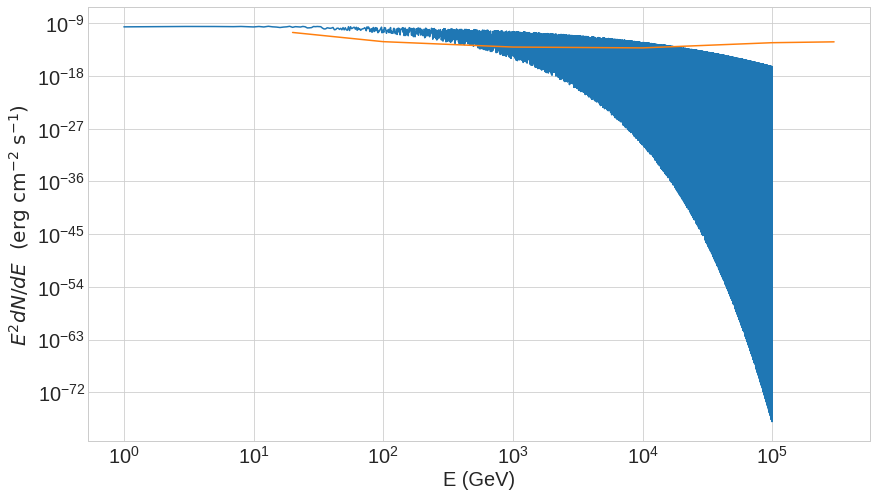

In [826]:
plt.figure(figsize=(14,8))
plt.loglog(E, E**2*dNdE*0.00160218)  ## *E**2*0.00160218
plt.loglog(x, sens)
# 0.00160218 GeV to erg
# plt.legend(fontsize = 20)
plt.ylabel(r"$E^2 dN/dE \ \ \rm (erg \ cm^{-2}\  s^{-1})$",fontsize = 20)
plt.xlabel("E (GeV)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.xlim(1,10000)
plt.show()

In [813]:
data = np.genfromtxt("bulge_data.csv", delimiter=',')    ## galactic longitude, latitude, distance, flux, and luminosity

In [814]:
def f_inspec(l, u):
    dE=(u-l)
    N = np.trapz(E[l:u]**2*dNdE[l:u]*0.00160218, dx=dE)
    N_norm = E[l:u]**2*dNdE[l:u]*0.00160218/N
#     print(N_norm)
    F = data[:,3]
    L = data[:,4]
    F_spec = []
    with tqdm(total=len(F)) as pbar:
        for f in F:
            F_spec.append(f*N_norm)
    #         F_spec = np.append( F_spec, f*N_norm )
            pbar.update()
    F_spec = np.array(F_spec)
    F = [sum(F_spec[i,l:u])*dE for i in range(len(F_spec))]

    return F

In [815]:
F1 = f_inspec(1,10)

100%|██████████| 50380/50380 [00:00<00:00, 322715.64it/s]


In [824]:
# F2 = f_inspec(100,200)

In [817]:
F3 = f_inspec(1000,10000)

100%|██████████| 50380/50380 [00:02<00:00, 21506.41it/s]


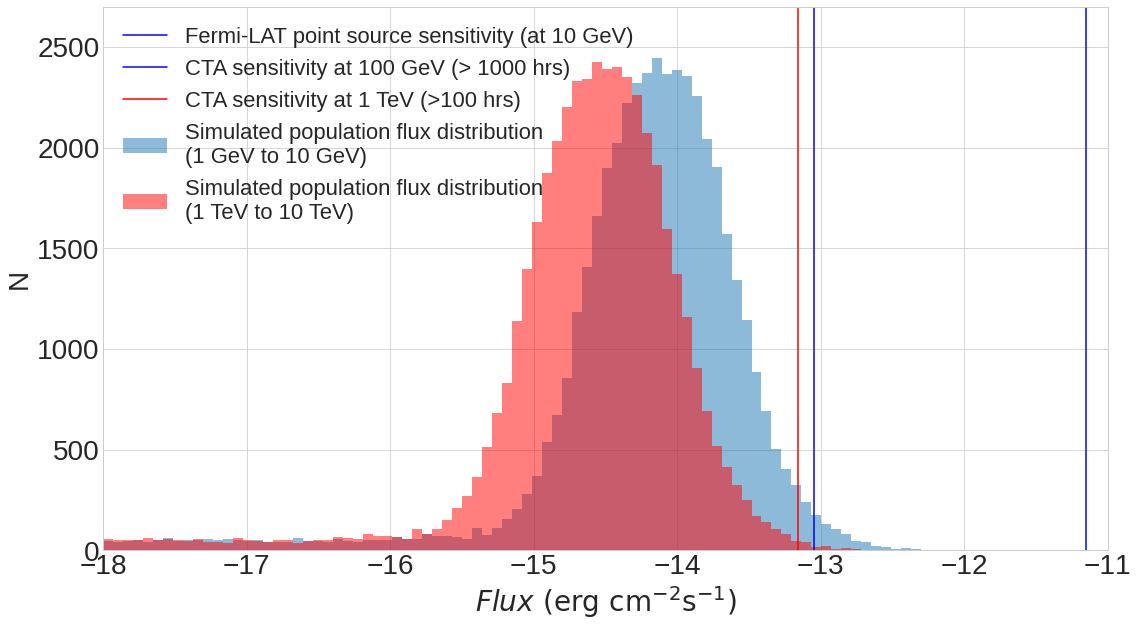

In [825]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if (p2[0] == p1[0]):
        xmin = xmax = p1[0]
#         ymin, ymax = ax.get_ybound()
        ymin, ymax = p1[1], p2[1]
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], c = c, alpha = 1, label = label, zorder=1)
    ax.add_line(l)
    return l

# F_sens = 2.8e-11         ##20 GeV
# F_sens = 1.521e-12      ##125 GeV
u = np.log10(F_sens + 0.507e-12)
l = np.log10(F_sens - 0.507e-12)

plt.figure(figsize=(18,10))
bins=np.histogram(np.log10(F), bins=300)[1]
plt.hist(np.log10(F1), bins, label="Simulated population flux distribution \n(1 GeV to 10 GeV)", alpha=0.5)
# plt.hist(np.log10(F2), bins, label="Simulated population flux distribution \n(100 GeV to 1 TeV)", alpha=0.5)
plt.hist(np.log10(F3), bins, label="Simulated population flux distribution \n(1 TeV to 10 TeV)", alpha=0.5, color="red")

c = "b"
F_sens = 7.1e-12         ##20 GeV
line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "Fermi-LAT point source sensitivity (at 10 GeV)")

# c = "red"
# F_sens = 2.8e-11         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 20 GeV")
# c = "tomato"
# F_sens = 9e-14         ##100 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 100 GeV (> 1000 hrs)")
c = "red"
F_sens = 7e-14       ##1 TeV
line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 1 TeV (>100 hrs)")
# c = "pink"
# F_sens = 6.5e-14         ##10 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 10 TeV")
# c = "purple"
# F_sens = 5e-13         ##100 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 100 TeV")
# c = "black"
# F_sens = 7e-13         ##300 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 300 TeV")

# plt.fill_between(line.get_data()[0], l, u, alpha = 0.3, edgecolor=c, facecolor=c, linewidth=1,
#                      label = "CTA sens", zorder=1)
plt.xlabel(r"$Flux\ (\rm erg \ cm^{-2} s^{-1} )$", fontsize=28)
plt.ylabel(r"N", fontsize=28)
plt.xlim(-18, -11)
plt.ylim(0, 2700)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=22, loc="upper left")
plt.savefig("flux.pdf")
plt.show()

In [514]:
sum(np.array(F)>F_sens)*7.75

317.75

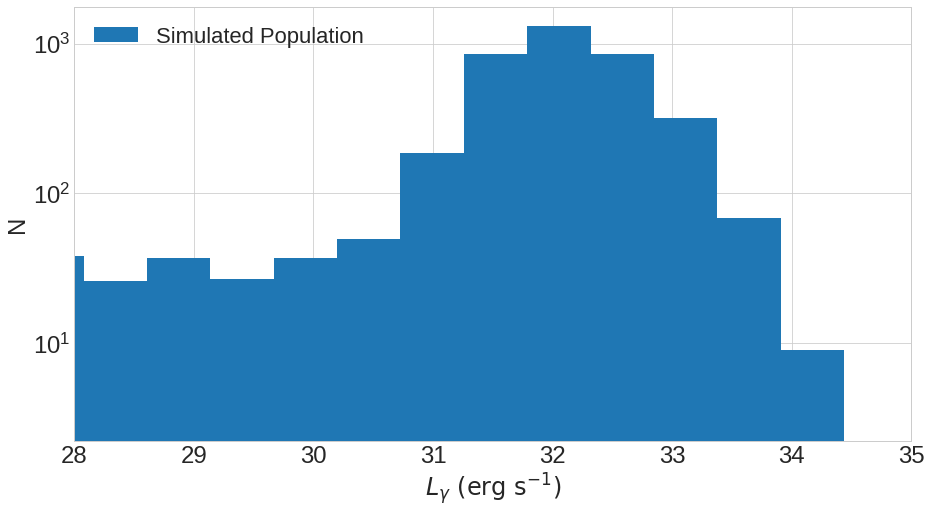

In [921]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if (p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
#         ymin, ymax = p1[1], p2[1]
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], c = c, alpha = 1, label = label, zorder=1)
    ax.add_line(l)
    return l




plt.figure(figsize=(15,8))
bins=np.histogram(np.log10(L), bins=40)[1]
plt.hist(np.log10(L), bins, log=True, label="Simulated Population")
# plt.hist(np.log10(F_fermi4fgl), bins, label="Fermi LAT 10-Year Point Source Catalog")

# c = "red"
# F_sens = 2.8e-11         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 20 GeV")
# c = "green"
# F_sens = 7.5e-13         ##100 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 100 GeV")
# c = "black"
# F_sens = 9e-14       ##1 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 1 TeV")
# # c = "pink"
# F_sens = 6.5e-14         ##10 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 10 TeV")
# c = "purple"
# F_sens = 5e-13         ##100 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 100 TeV")
# c = "black"
# F_sens = 7e-13         ##300 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 300 TeV")

# plt.fill_between(line.get_data()[0], l, u, alpha = 0.3, edgecolor=c, facecolor=c, linewidth=1,
#                      label = "CTA sens", zorder=1)
plt.xlabel(r"$L_\gamma\ (\rm erg \ s^{-1} )$", fontsize=24)
plt.ylabel(r"N", fontsize=24)
plt.xlim(28, 35)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=22)
plt.savefig("L_dist.pdf")
plt.show()

In [636]:
np.mean(L)

9.0676139352864185e+31

In [925]:
sum(10**L_comp)

4.1015231610415696e+35

In [903]:
disk_dat = np.loadtxt("chris_disk.txt", delimiter = ",")

In [904]:
L_comp = disk_dat[:,0]
Lprob = disk_dat[:,1]
L = dNdL_gamma2[138]

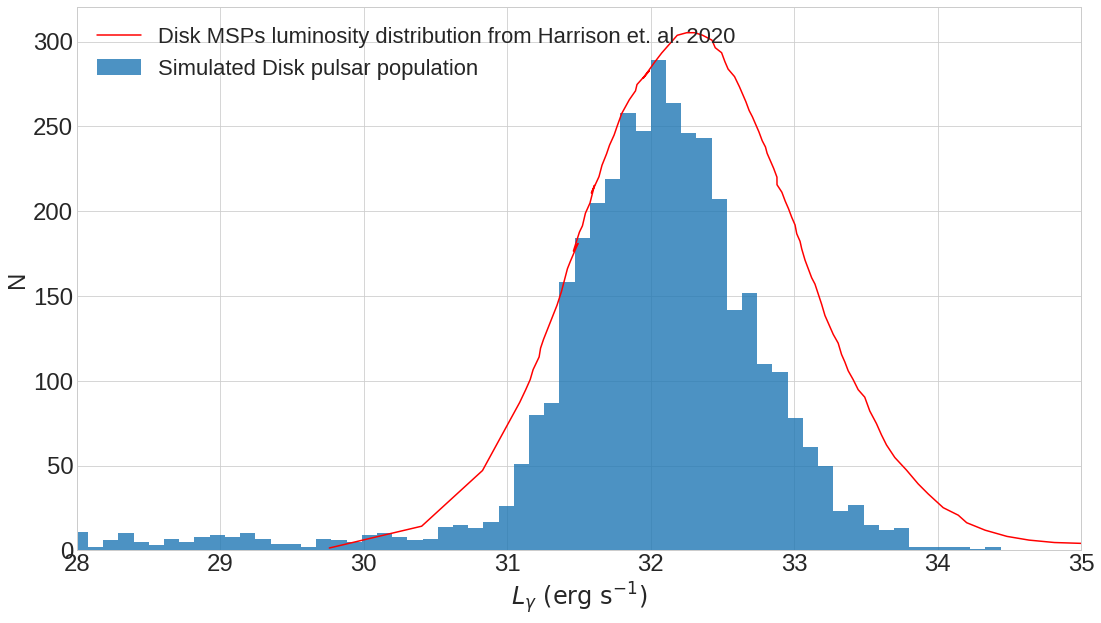

In [916]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if (p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
#         ymin, ymax = p1[1], p2[1]
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], c = c, alpha = 1, label = label, zorder=1)
    ax.add_line(l)
    return l




plt.figure(figsize=(18,10))
bins=np.histogram(np.log10(L), bins=200)[1]
plt.hist(np.log10(L), bins, label="Simulated Disk pulsar population", alpha=0.8)
plt.plot(L_comp, Lprob*len(L)/8, label="Disk MSPs luminosity distribution from Harrison et. al. 2020", alpha = 1, color="red")

# c = "red"
# F_sens = 2.8e-11         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 20 GeV")
# c = "green"
# F_sens = 7.5e-13         ##100 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 100 GeV")
# c = "black"
# F_sens = 9e-14       ##1 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 1 TeV")
# # c = "pink"
# F_sens = 6.5e-14         ##10 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 10 TeV")
# c = "purple"
# F_sens = 5e-13         ##100 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 100 TeV")
# c = "black"
# F_sens = 7e-13         ##300 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 300 TeV")

# plt.fill_between(line.get_data()[0], l, u, alpha = 0.3, edgecolor=c, facecolor=c, linewidth=1,
#                      label = "CTA sens", zorder=1)
plt.xlabel(r"$L_\gamma\ (\rm erg \ s^{-1} )$", fontsize=24)
plt.ylabel(r"N", fontsize=24)
plt.xlim(28, 35)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=22, loc="upper left")
# plt.savefig("L_dist.pdf")
plt.show()

In [1191]:
len(bulge[1,:-1]), len(n)

(64, 64)

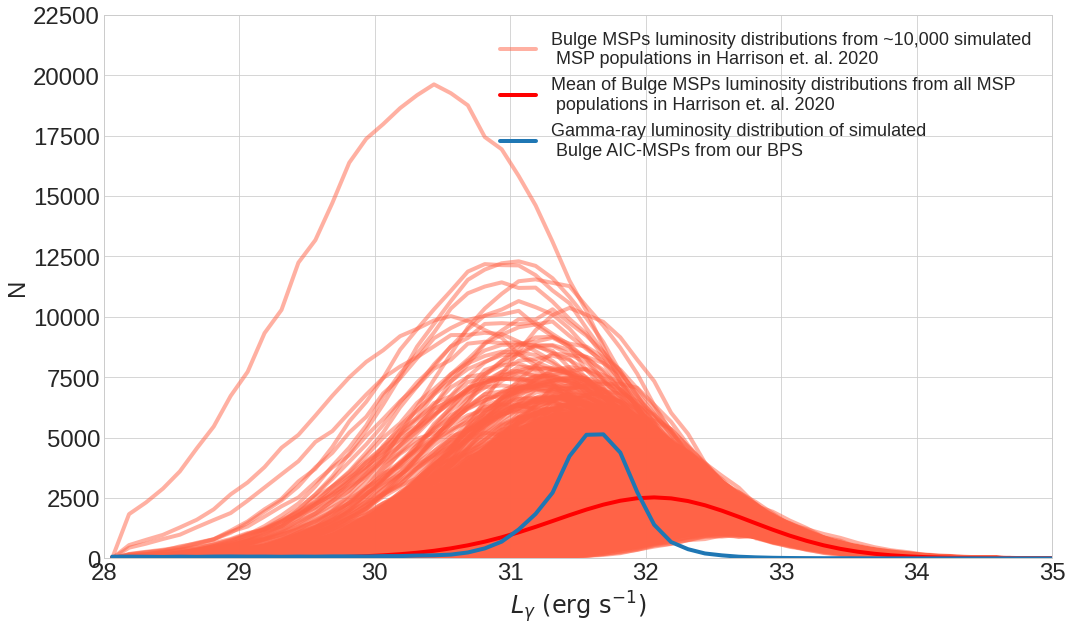

In [1296]:
plt.figure(figsize=(17,10))
x = bulge[0,:-1]
L = [l for l in dNdL_gamma1[1380] if np.log10(l)>x[0]]
y = []
for i in range(1,len(bulge)-1):
    width = np.append(0,np.diff(x))
    y.append(bulge[i,:-1]* width * bulge[i,-1])
    plt.plot(x,y[i-1], color="tomato", alpha=0.5, linewidth=4, 
             label="Bulge MSPs luminosity distributions from ~10,000 simulated \n MSP populations in Harrison et. al. 2020")
y = np.mean(y, axis=0)
plt.plot(x, y, alpha=1, color = "red", linewidth=4, zorder=2,
        label="Mean of Bulge MSPs luminosity distributions from all MSP \n populations in Harrison et. al. 2020")
n, bins = np.histogram(np.log10(L), bins=x)
ydata = n*k_bulge
y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).mean()
plt.plot(x[:-1], y_fit, linewidth=4, label="Gamma-ray luminosity distribution of simulated \n Bulge AIC-MSPs from our BPS")
plt.xlabel(r"$L_\gamma\ (\rm erg \ s^{-1} )$", fontsize=24)
plt.ylabel(r"N", fontsize=24)
plt.xlim(28, 35)
plt.ylim(0,22500)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18, loc="upper right")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [1300]:
M_disk = 3.7e10
# M_sim = 1.63e8
M_sim = 2e9
k_disk = M_disk/M_sim

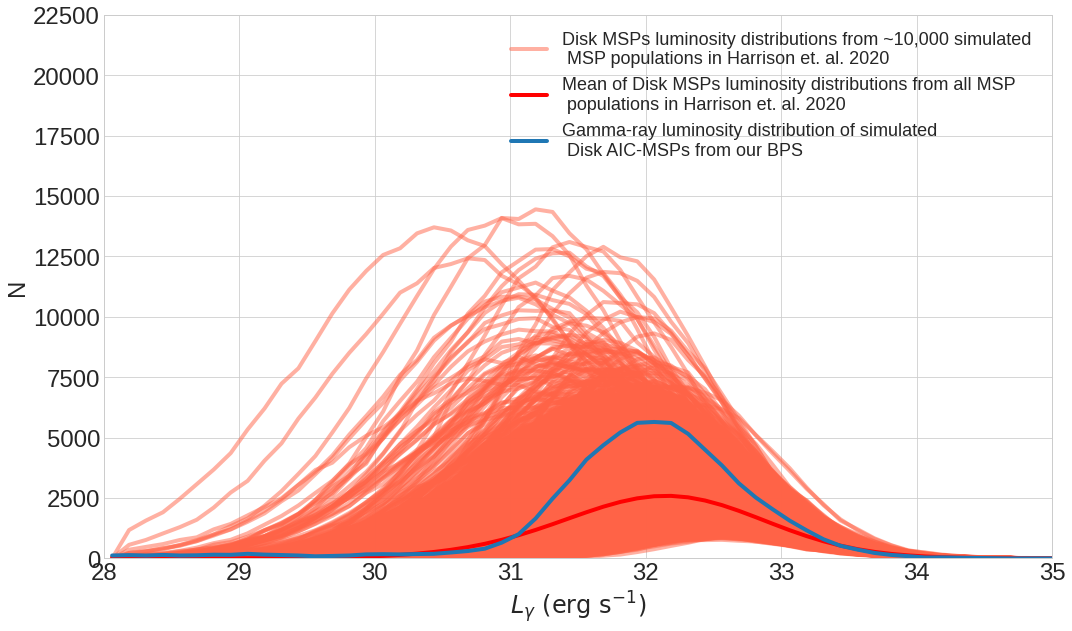

In [1301]:
plt.figure(figsize=(17,10))
x = bulge[0,:-1]
L = [l for l in dNdL_gamma2[138] if np.log10(l)>x[0]]
y = []
for i in range(1,len(disk)-1):
    width = np.append(0,np.diff(x))
    y.append(disk[i,:-1]* width * disk[i,-1])
    plt.plot(x,y[i-1], color="tomato", alpha=0.5, linewidth=4, 
             label="Disk MSPs luminosity distributions from ~10,000 simulated \n MSP populations in Harrison et. al. 2020")
y = np.mean(y, axis=0)
plt.plot(x, y, alpha=1, color = "red", linewidth=4, zorder=2,
        label="Mean of Disk MSPs luminosity distributions from all MSP \n populations in Harrison et. al. 2020")
n, bins = np.histogram(np.log10(L), bins=x)
ydata = n*k_disk
y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).mean()
plt.plot(x[:-1], y_fit, linewidth=4, label="Gamma-ray luminosity distribution of simulated \n Disk AIC-MSPs from our BPS")
plt.xlabel(r"$L_\gamma\ (\rm erg \ s^{-1} )$", fontsize=24)
plt.ylabel(r"N", fontsize=24)
plt.xlim(28, 35)
plt.ylim(0,22500)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18, loc="upper right")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()